# Model Training with Synthetic Data - Analysis

In [77]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns

from utils import get_predictions, make_confusion_matrix, AUROC, plot_roc

In [110]:
with open("../../classes.txt") as f:
    classes = f.read().splitlines()
pandas_query = [f'Prob_{c}' for c in classes]
model_names = ['R_r1', 'R1800S_r1', 'R3600S_r1', 'RB_r1', 'R_r2', 'R1800S_r2', 'R3600S_r2', 'RB_r2', 'RB2', 'S']

## Get predictions for all trained models

In [111]:
all_csvs = [path for path in os.listdir('.') if path.endswith('.csv')]
model_dfs = [get_predictions(m + '.csv', classes=pandas_query) for m in model_names]
preds_dict = {k: v for k, v in zip(model_names, model_dfs)}

## Plot confusion matrices for all models 

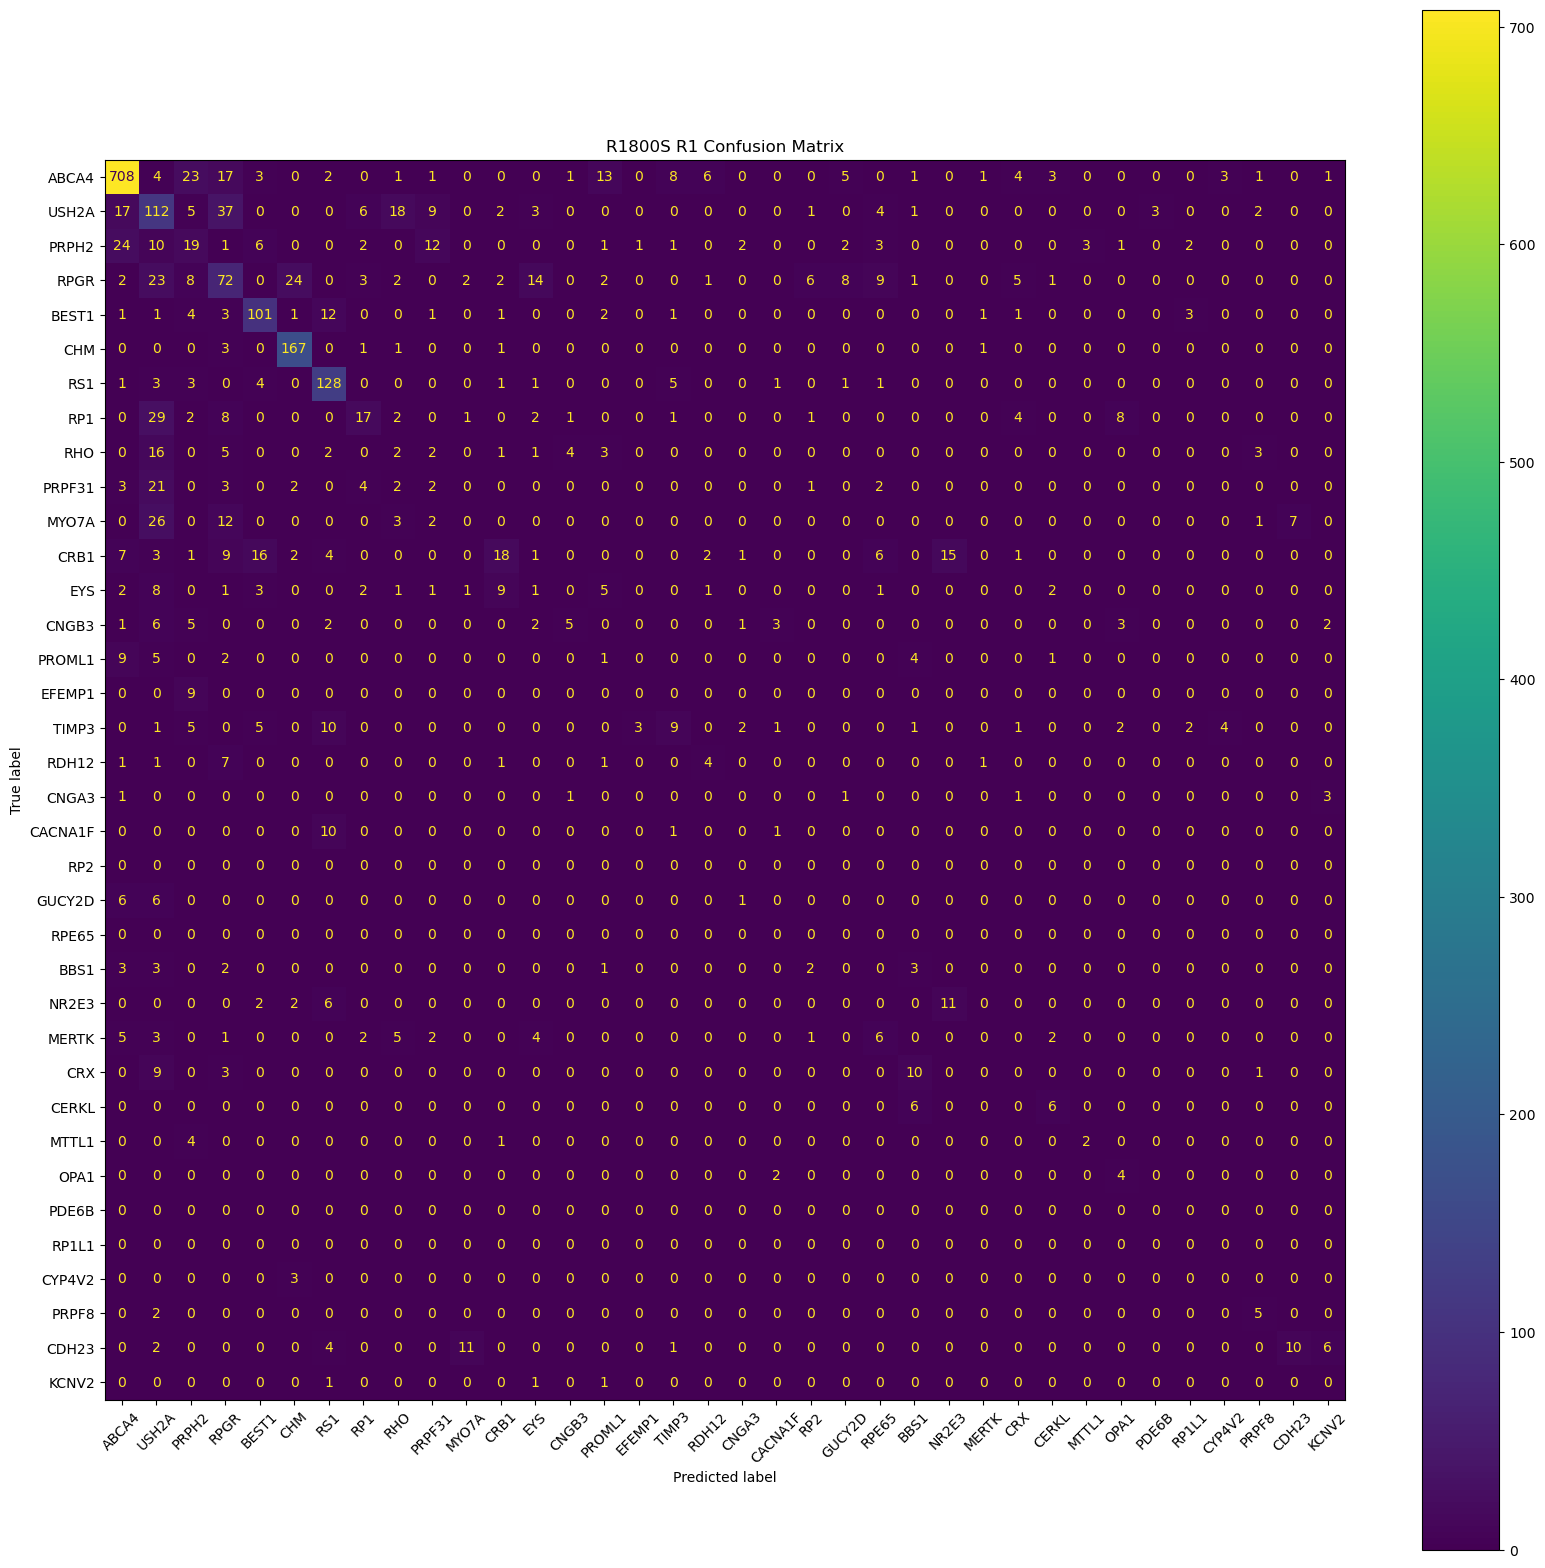

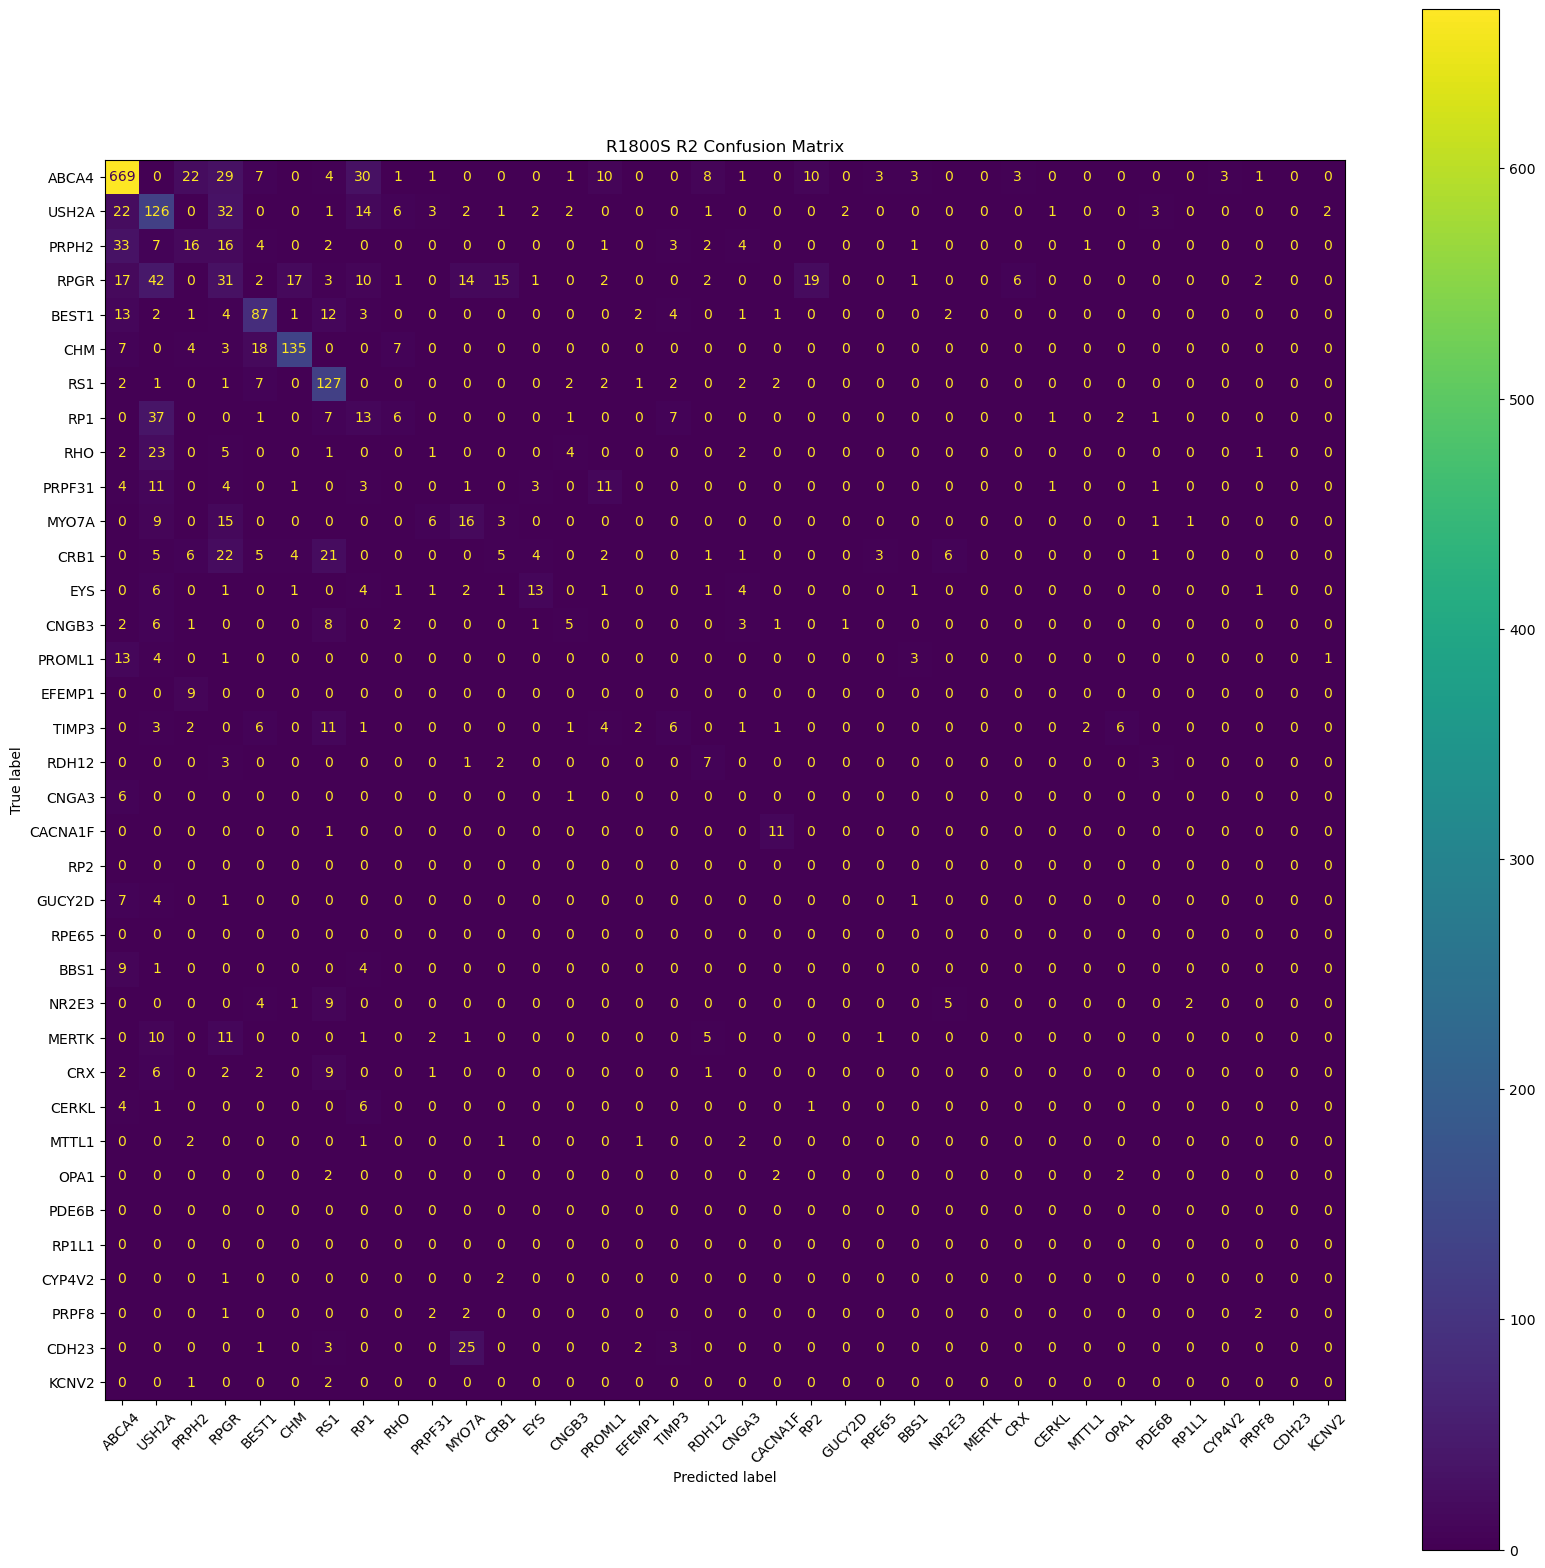

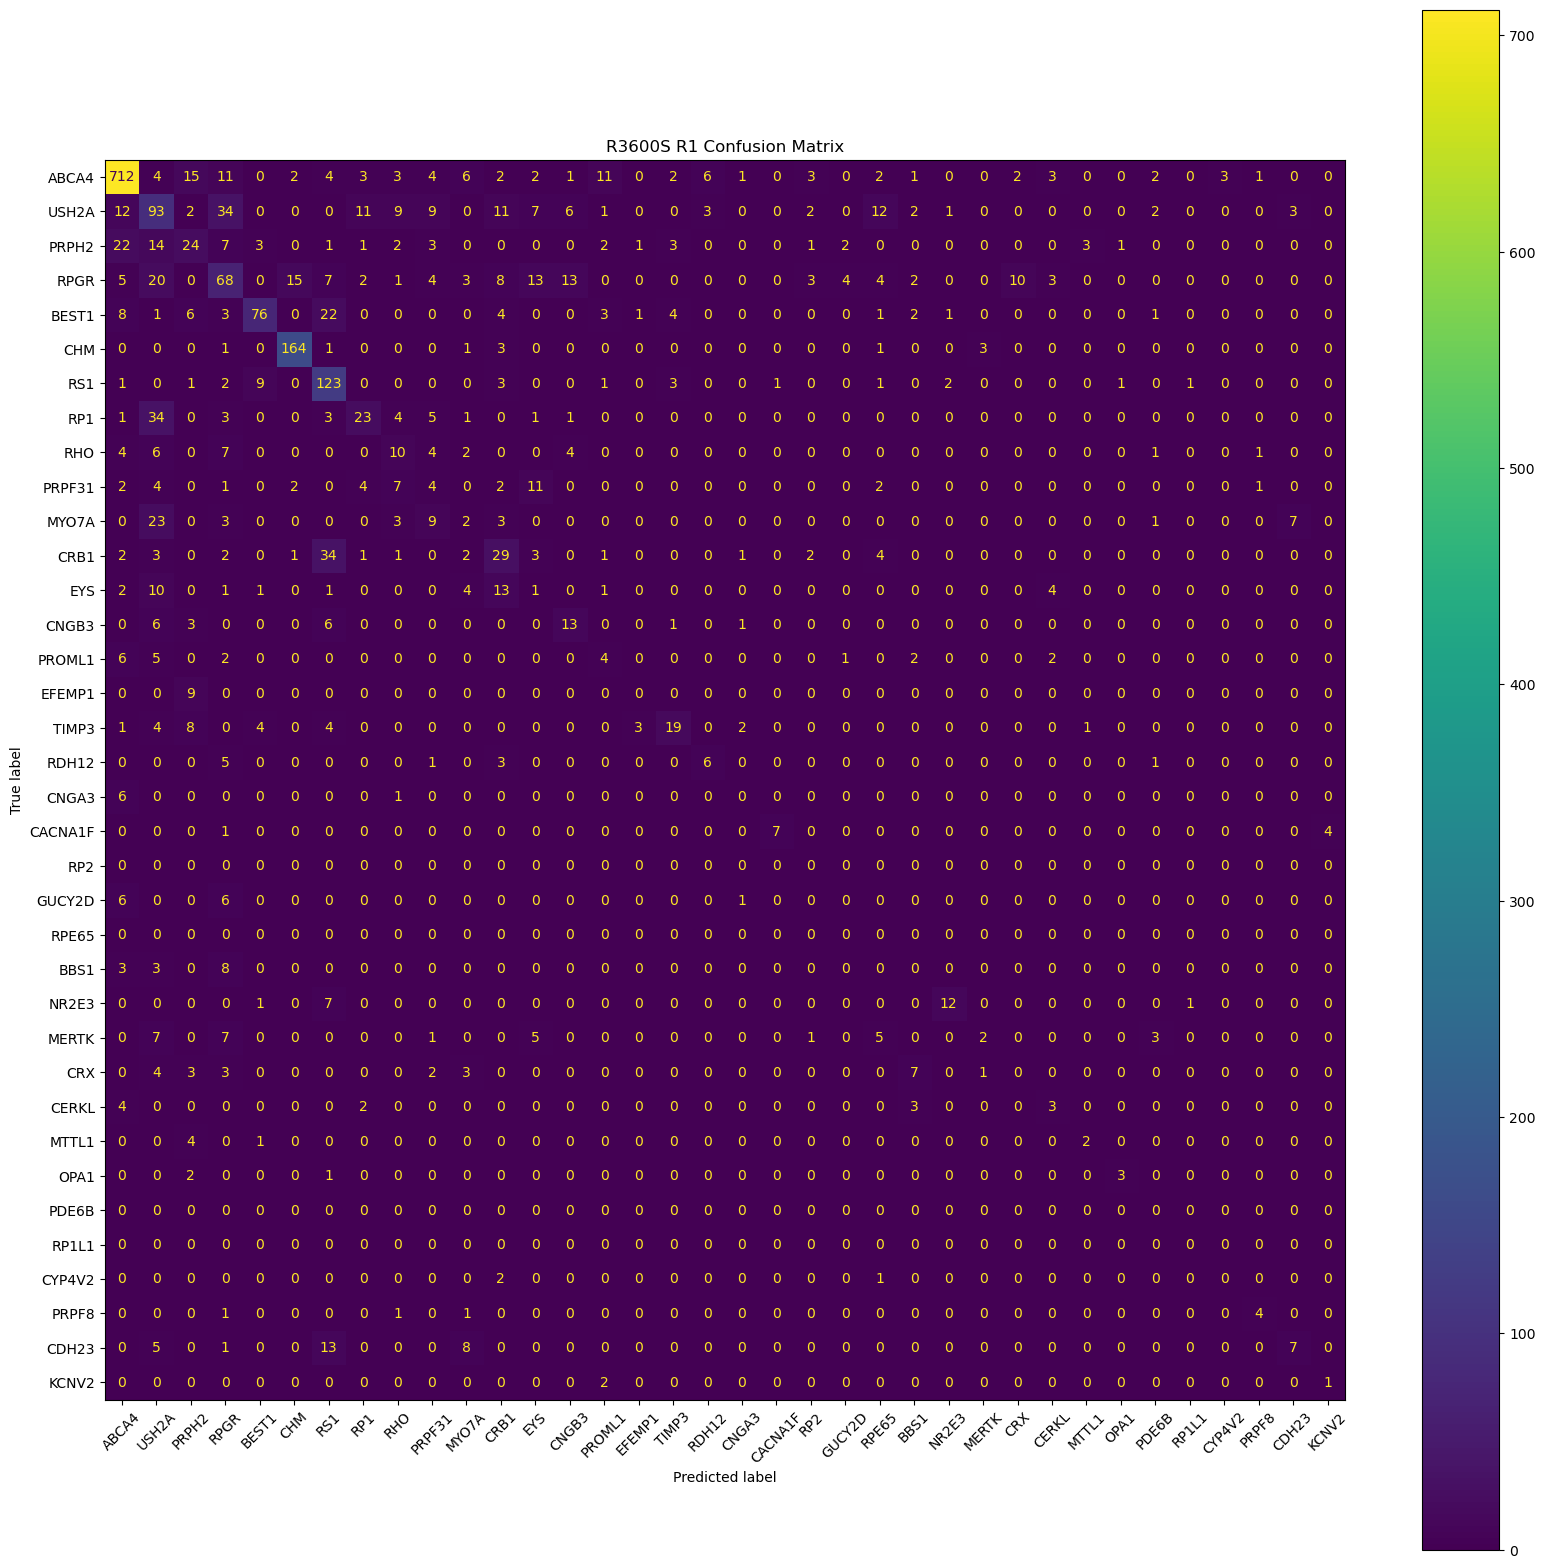

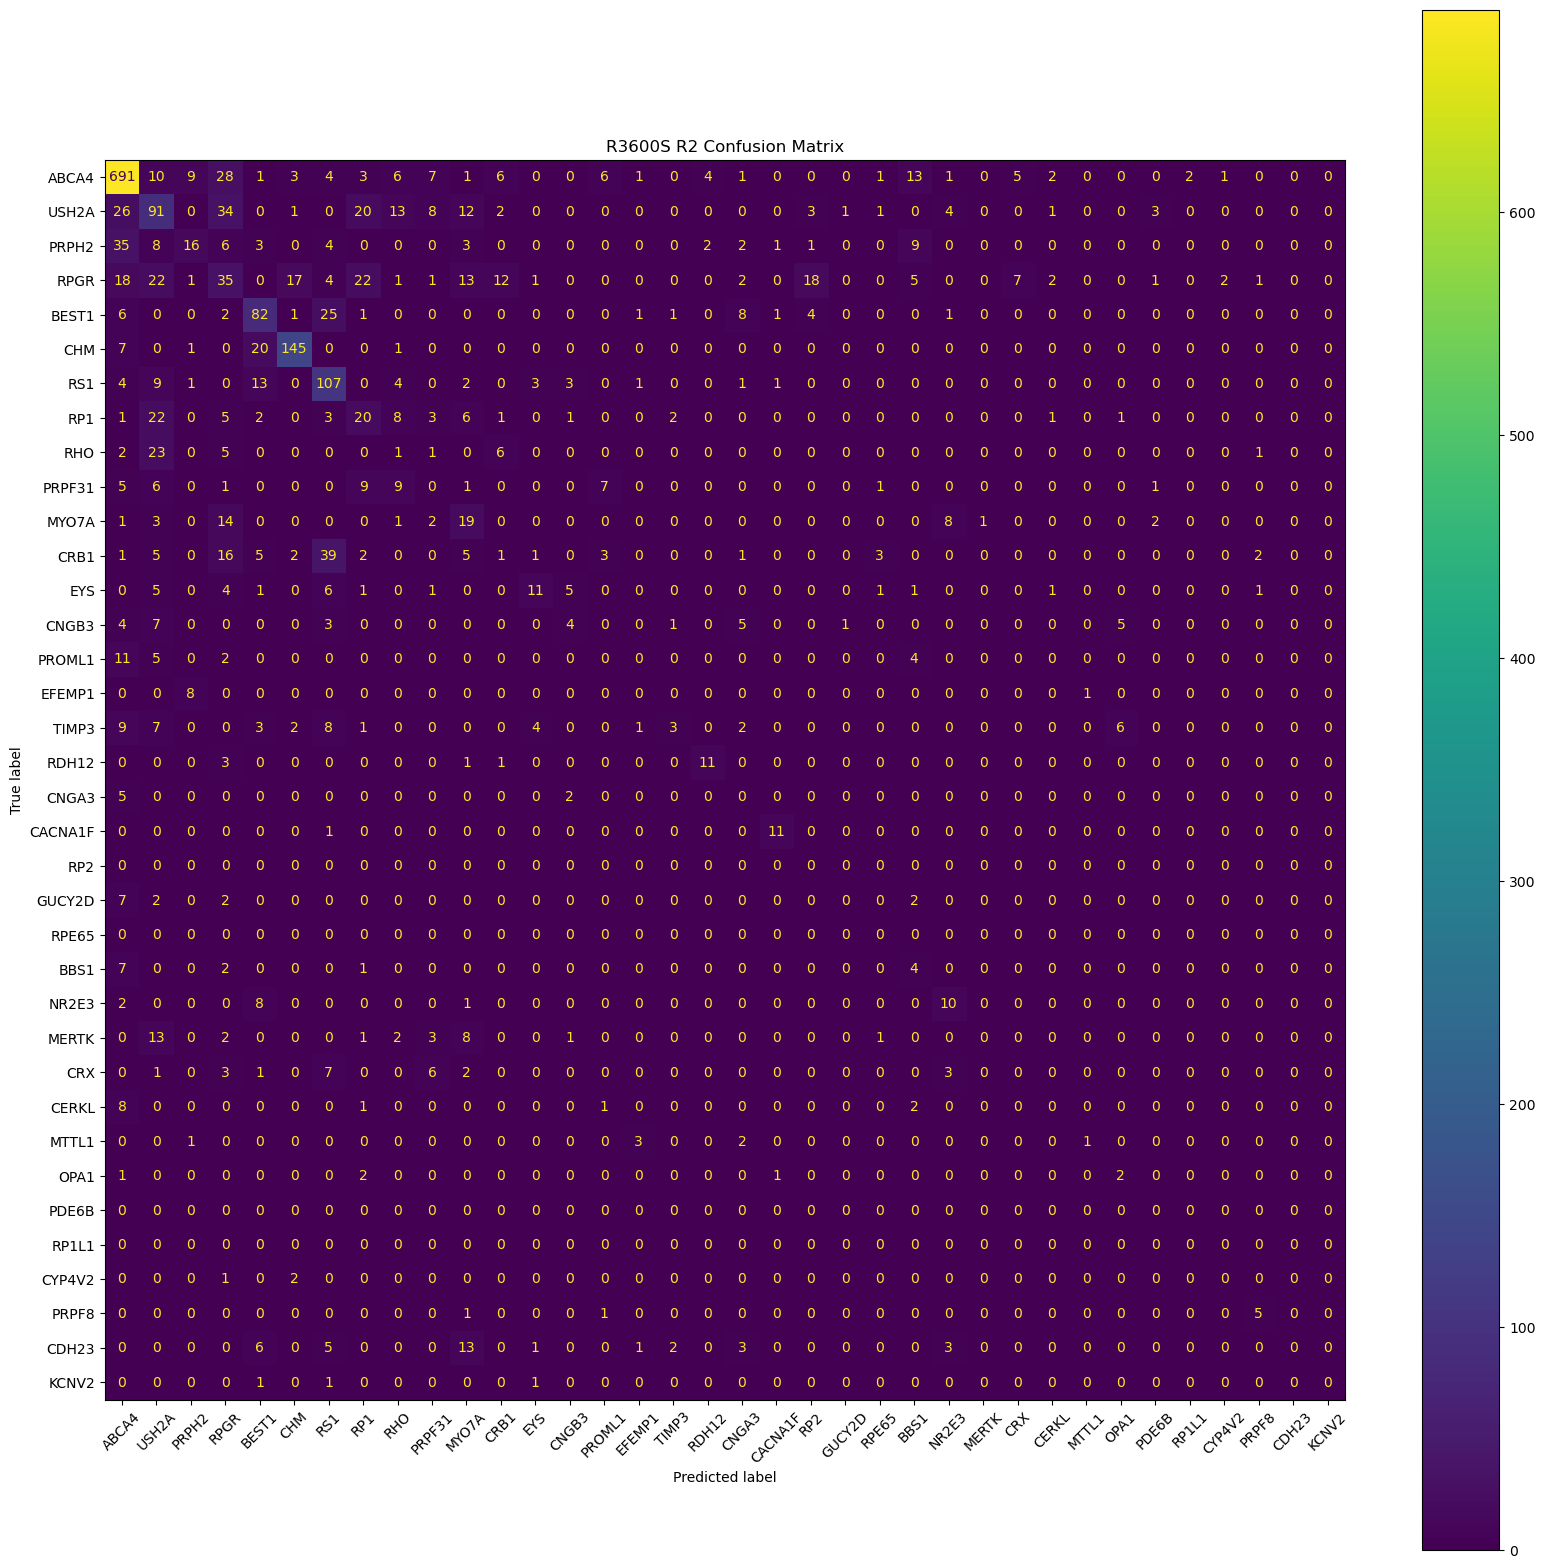

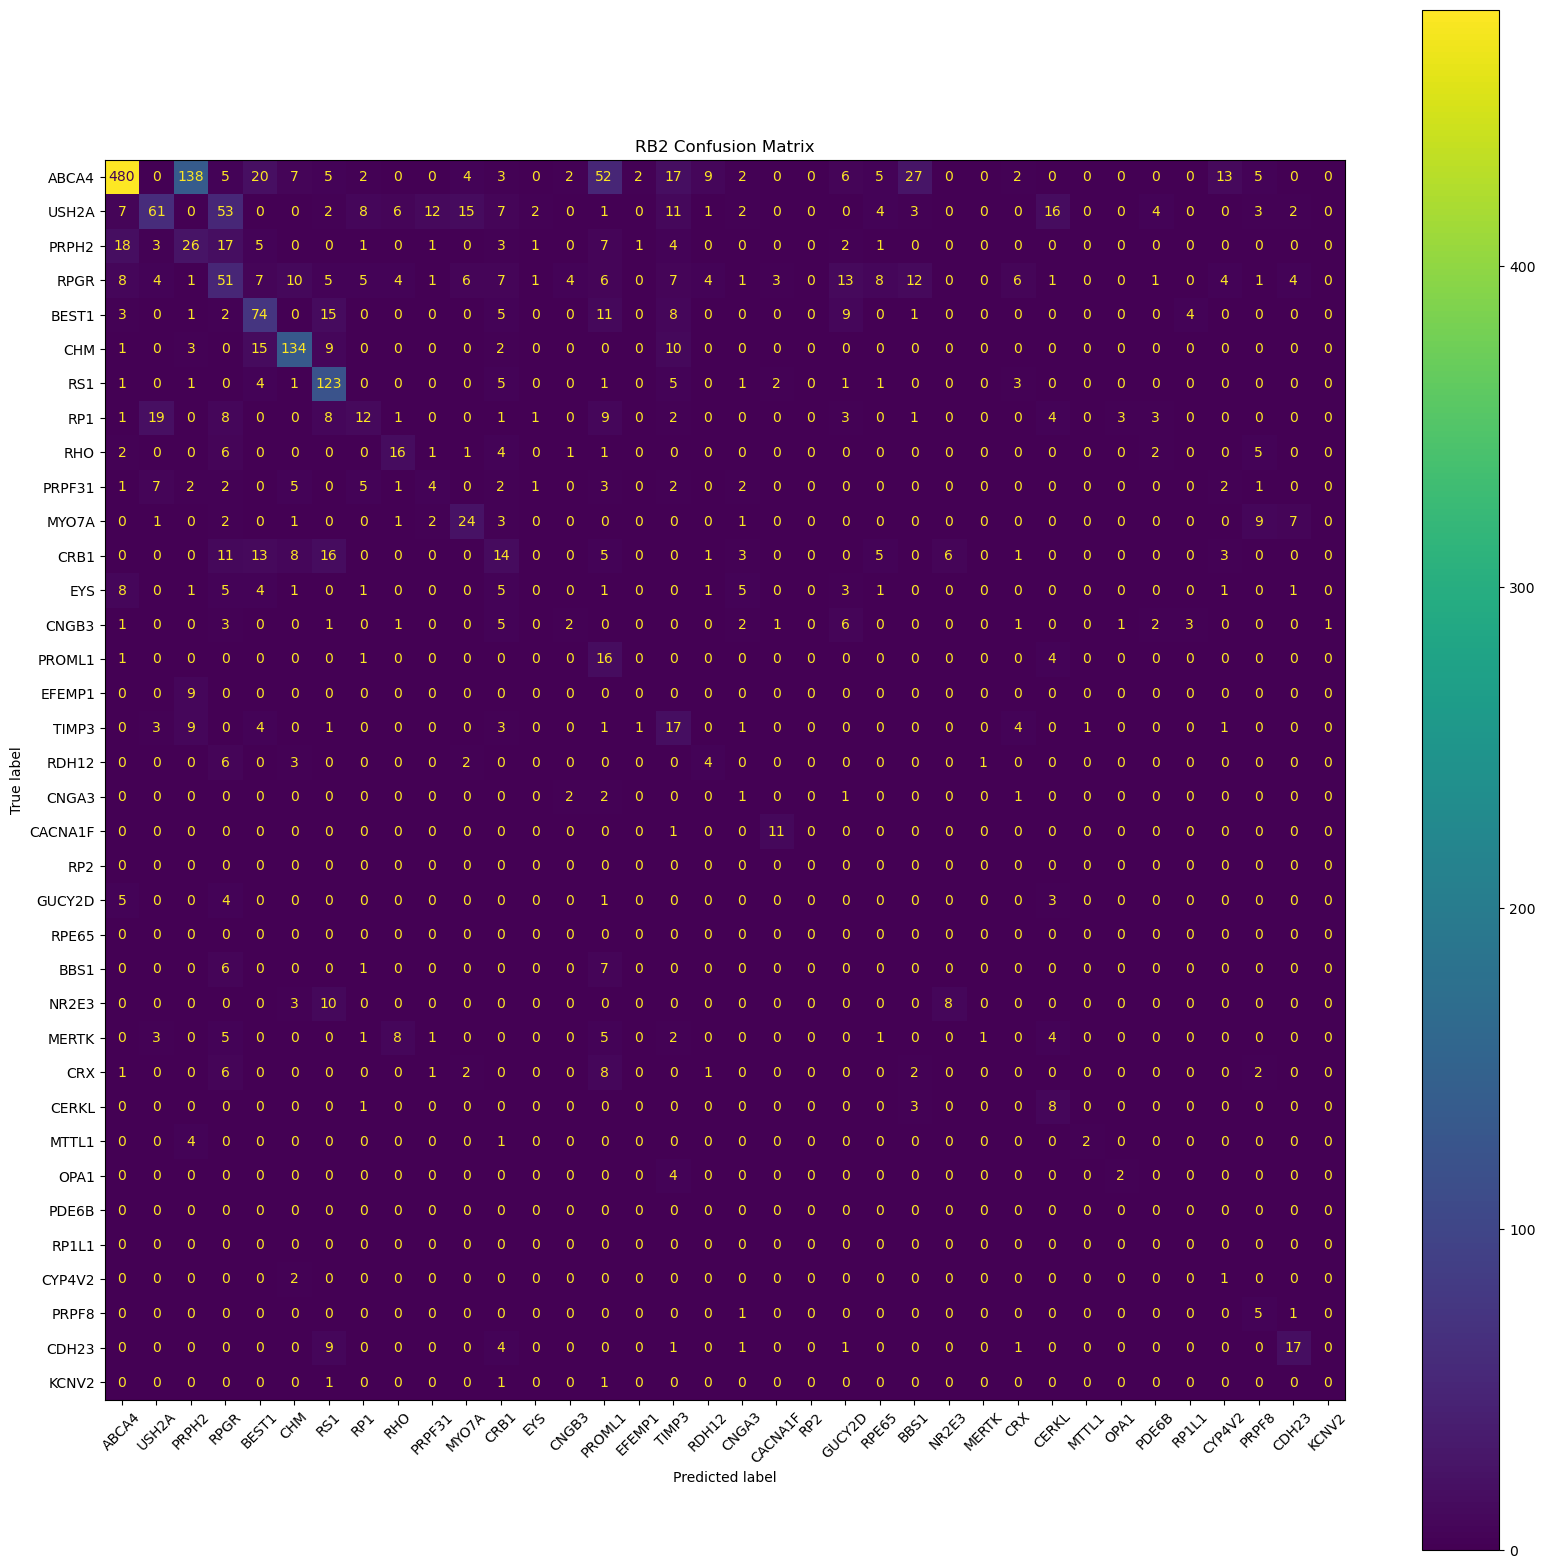

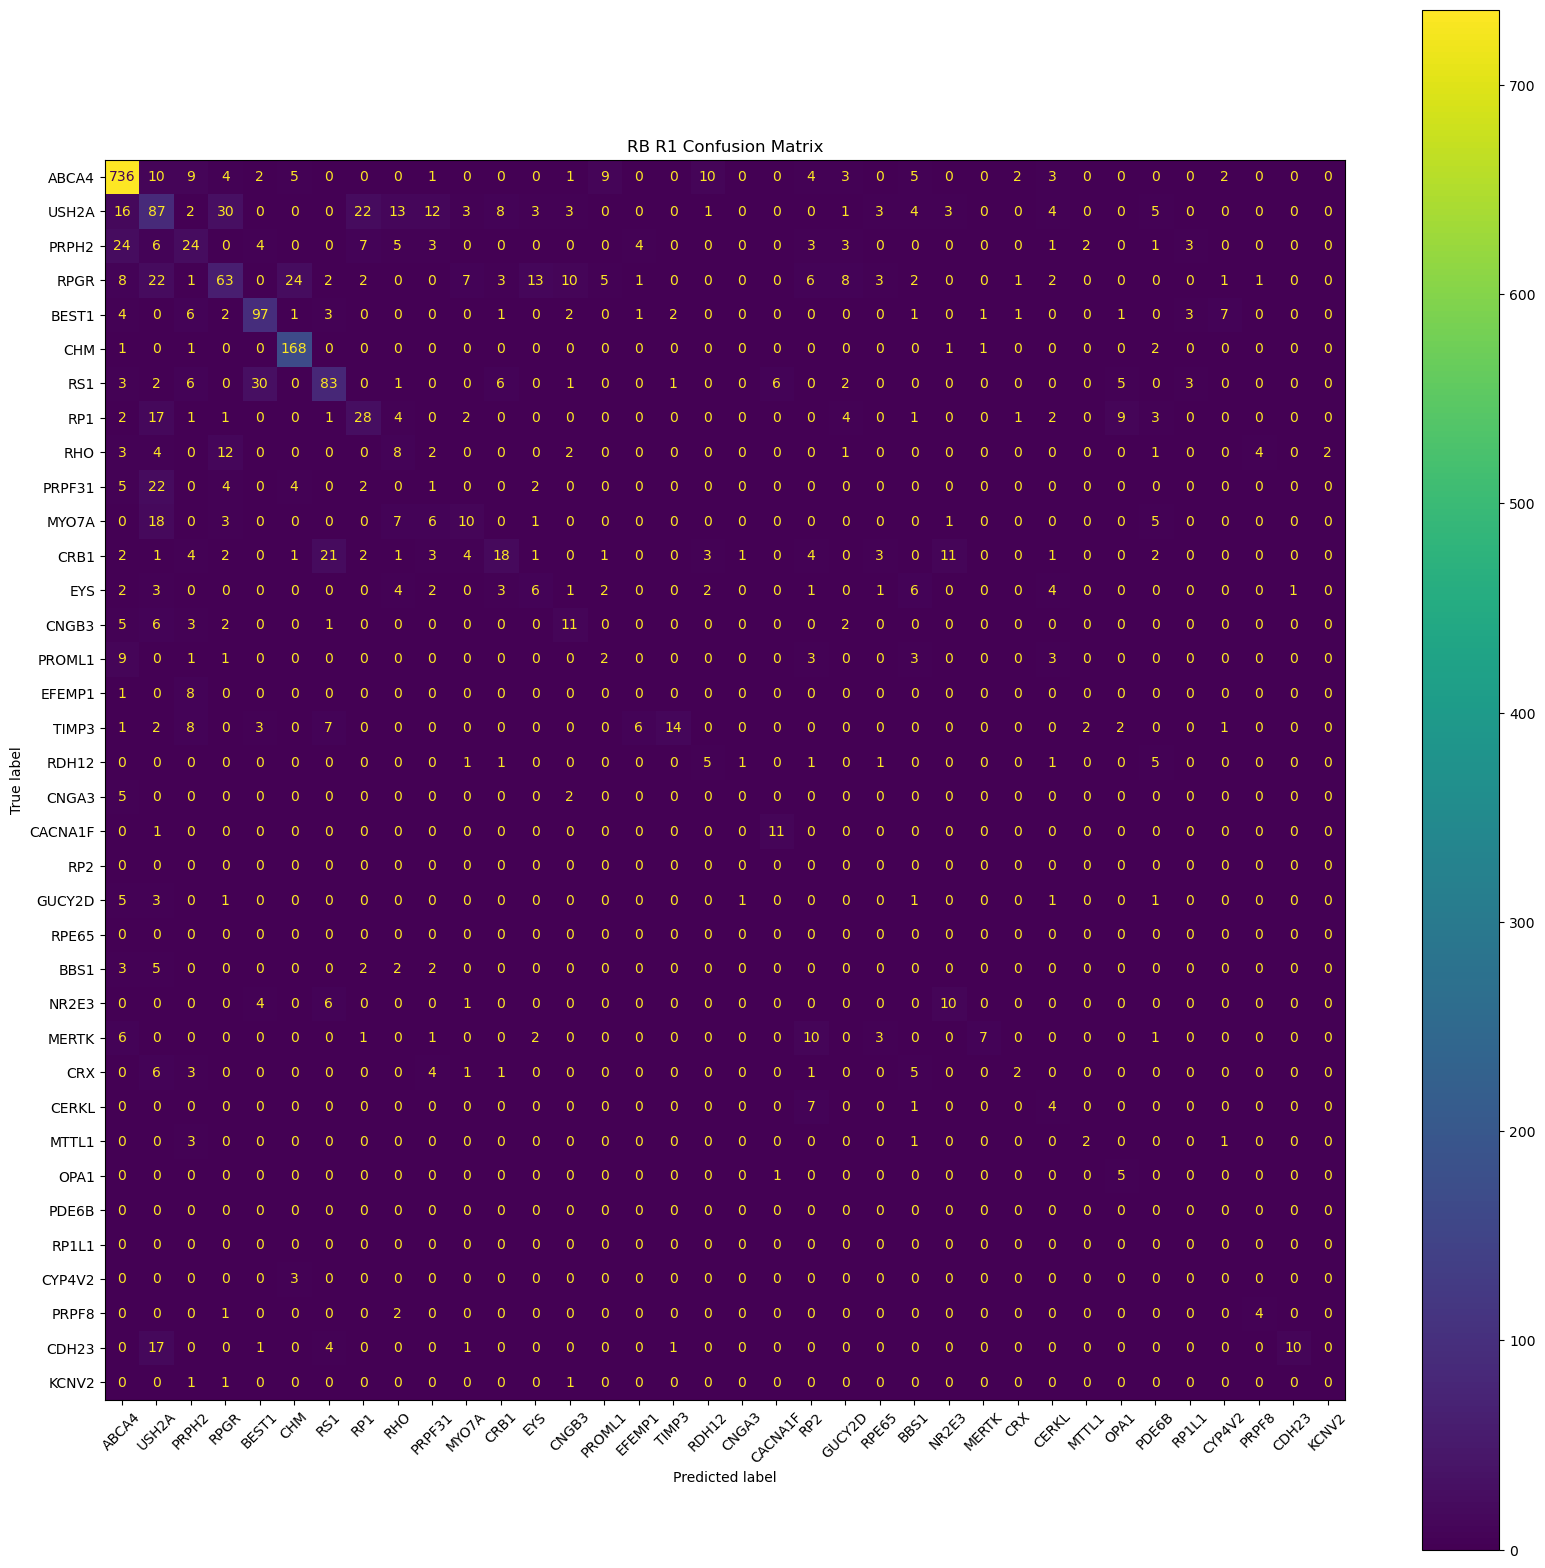

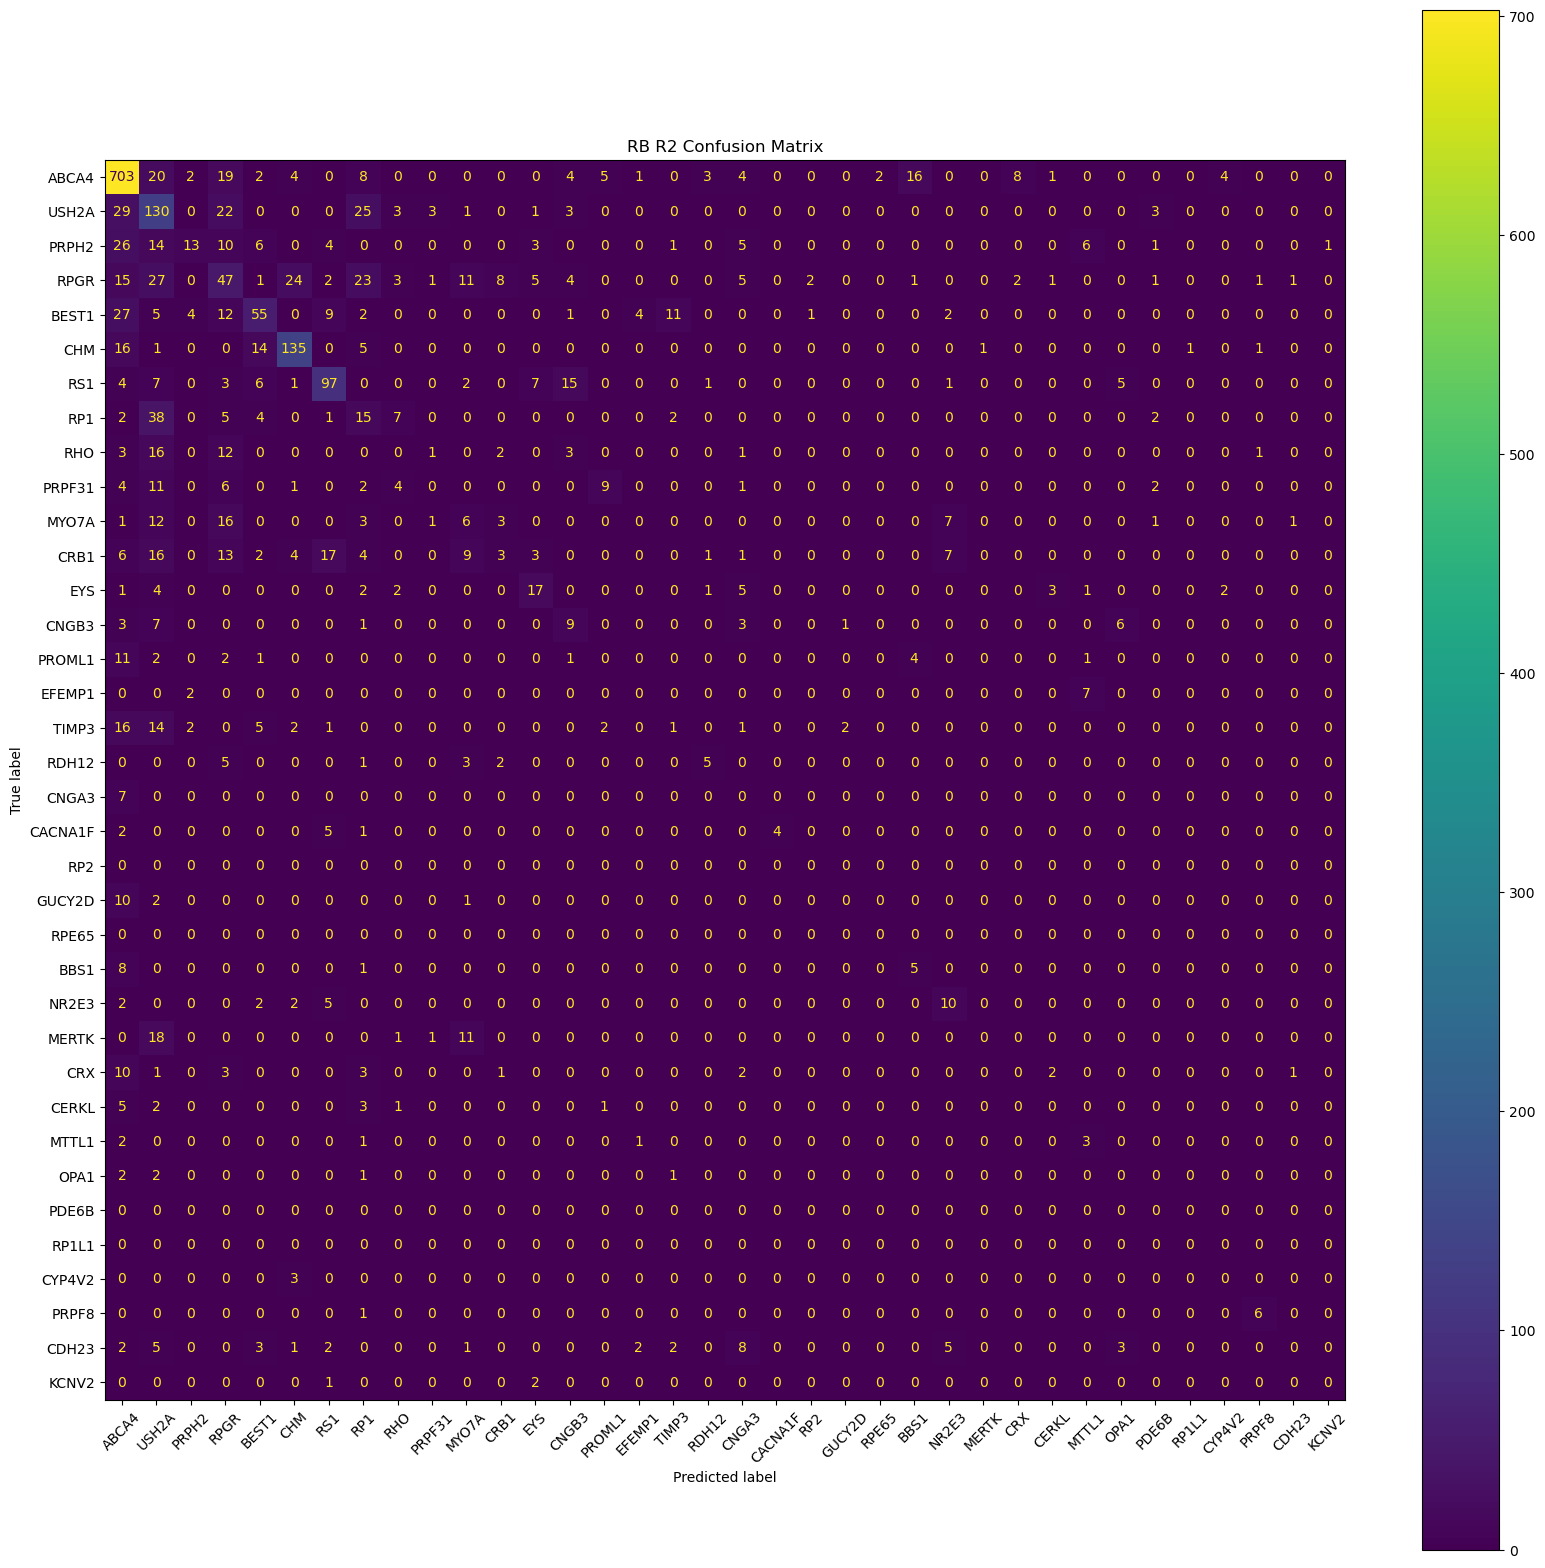

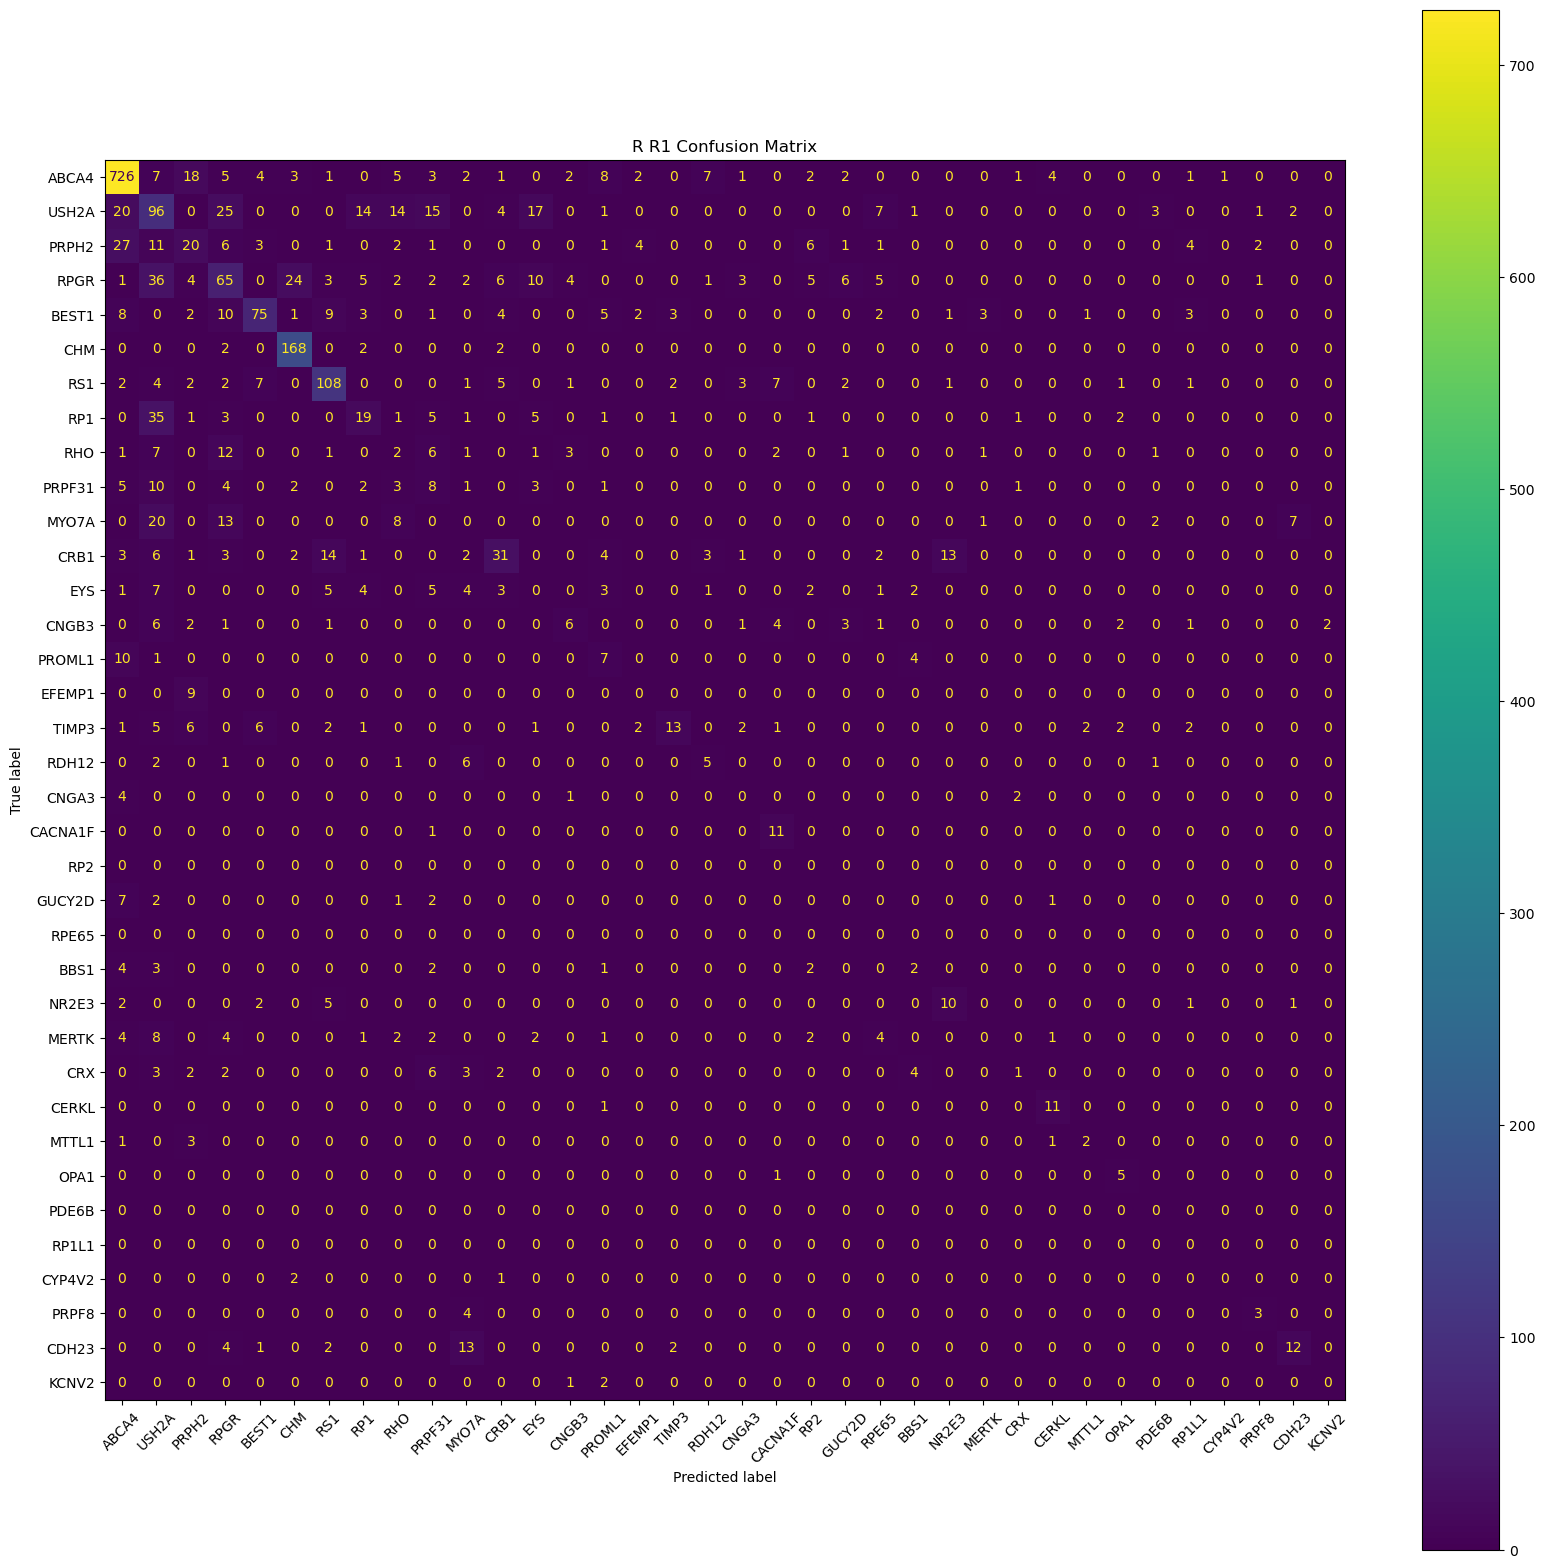

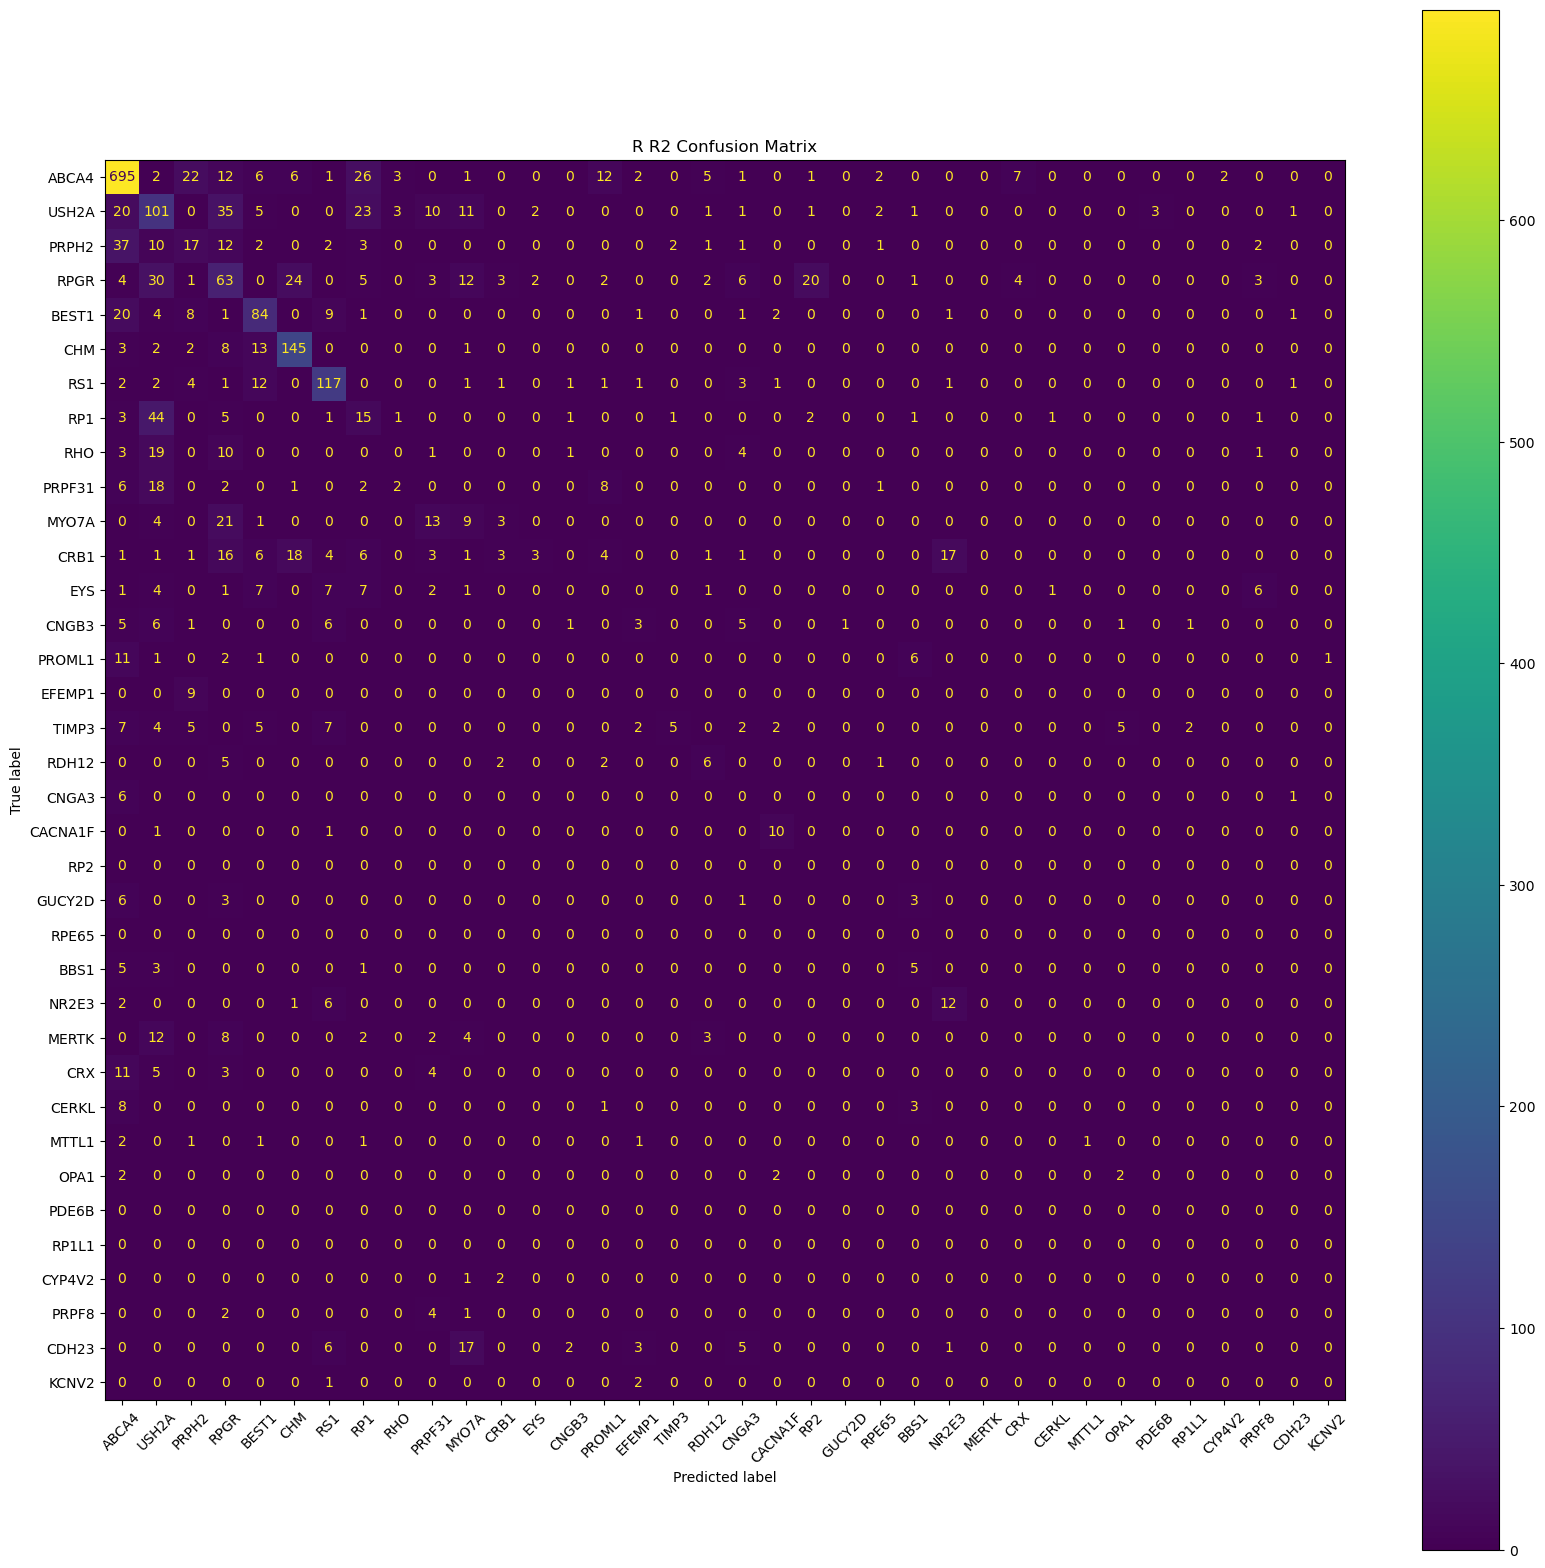

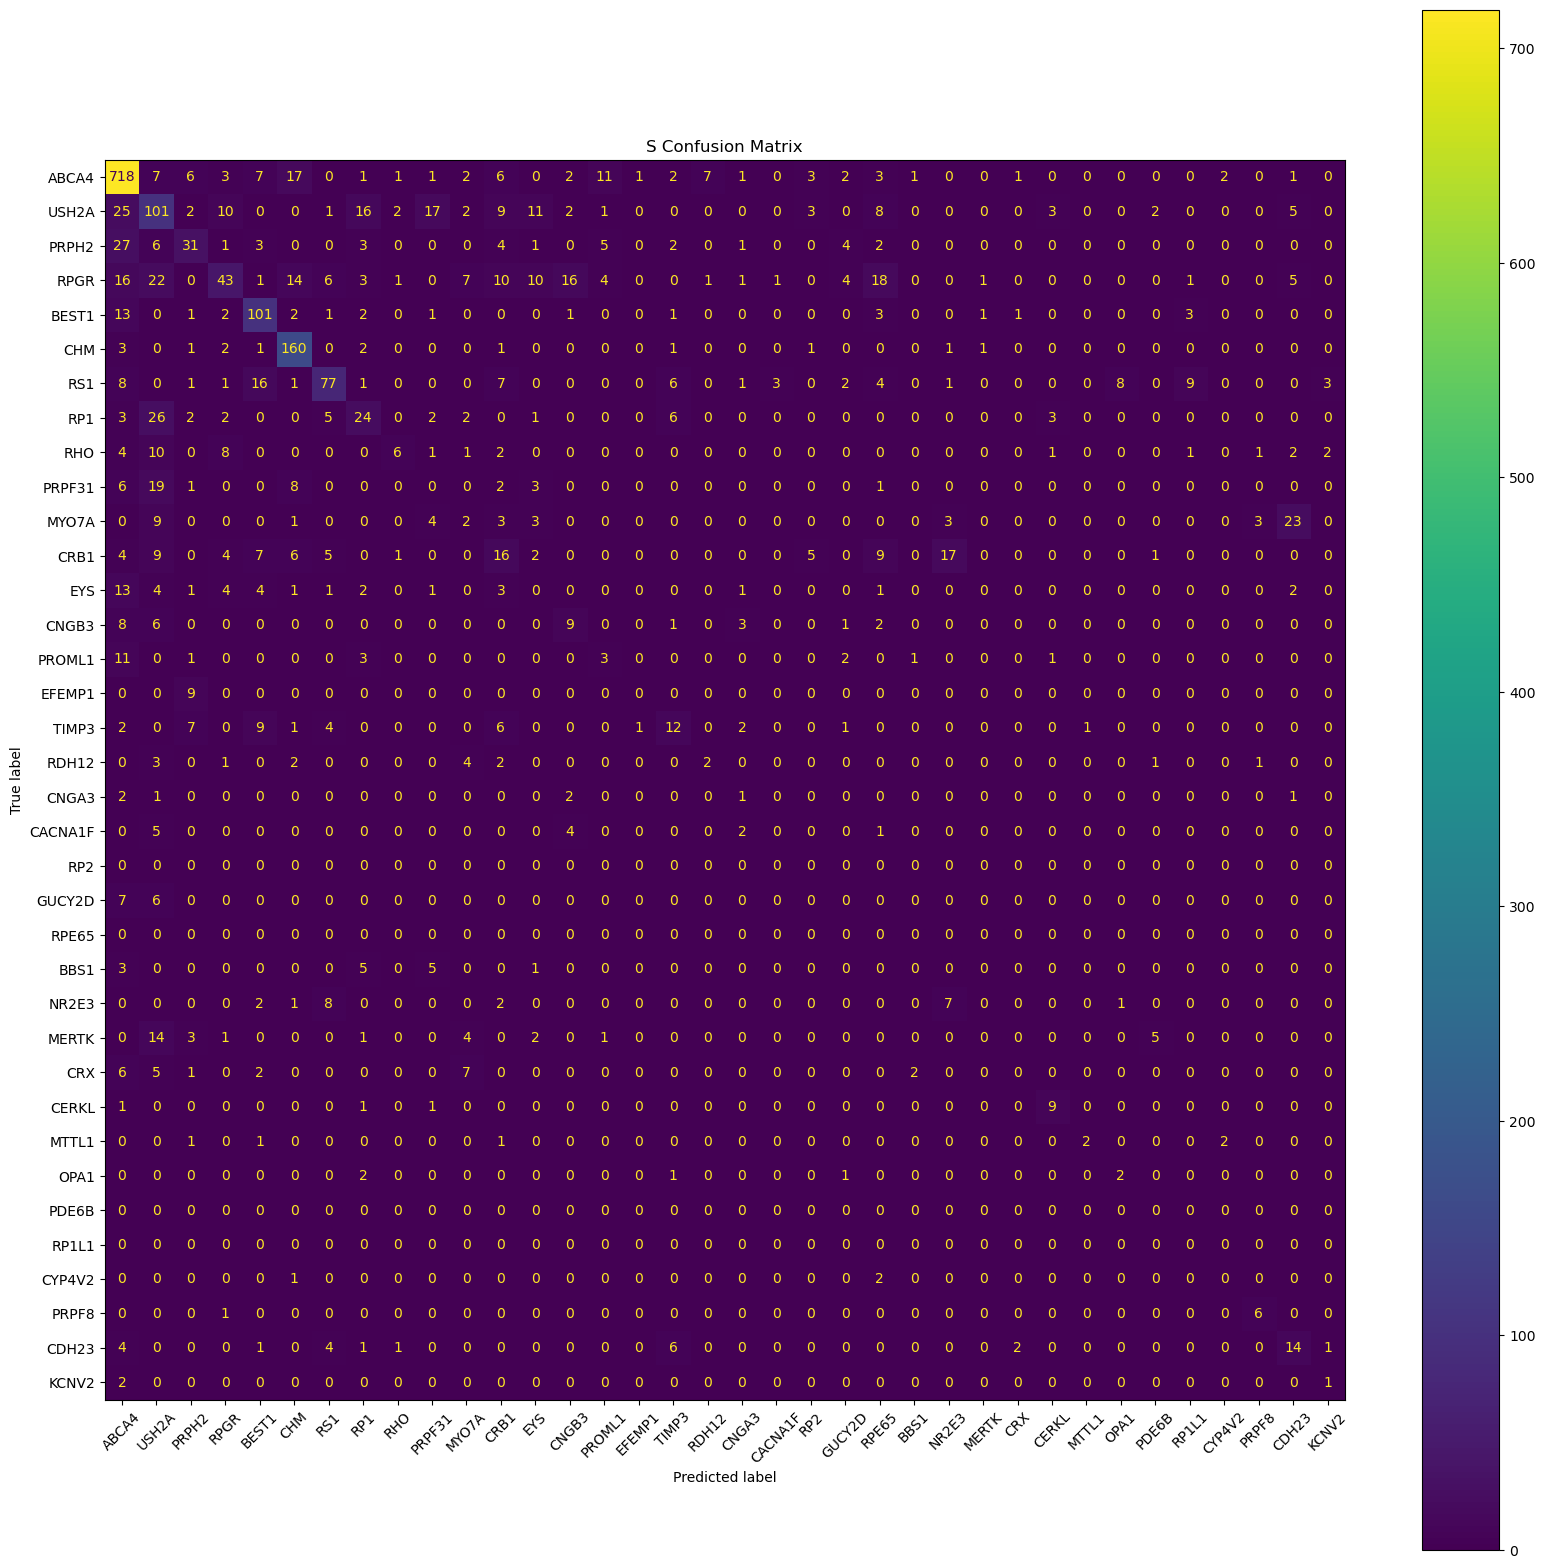

In [7]:
cm_titles = [m.split('_')[0].upper() + ' ' + m.split('_')[1].upper() if '_' in m else m for m in preds_dict.keys()]
cm = {m: make_confusion_matrix(preds_dict[m], labels=classes, title=cm_titles[i] + ' Confusion Matrix') for i, m in enumerate(preds_dict.keys())}

## Plot barplots of Predicted vs True Class Frequencies

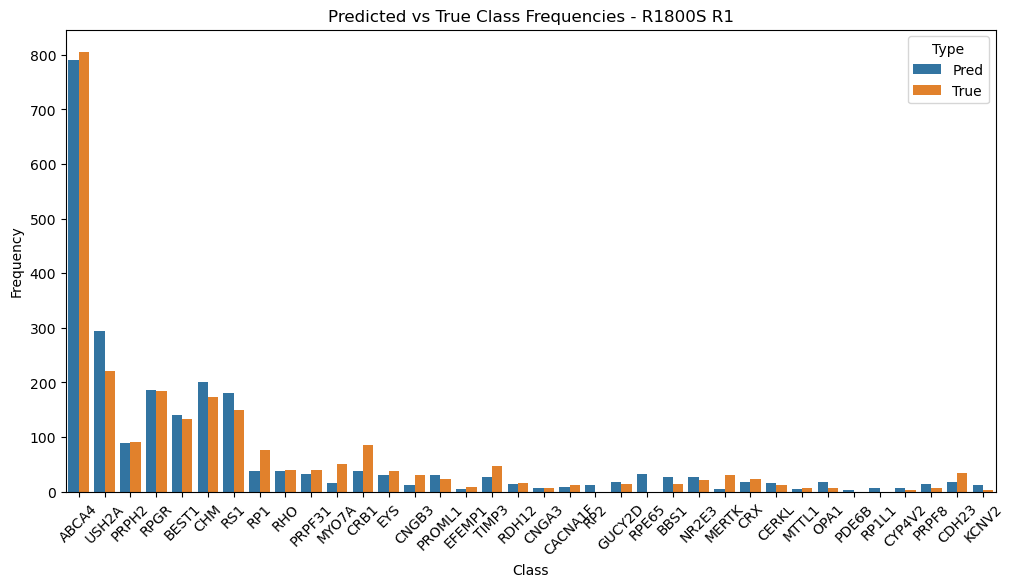

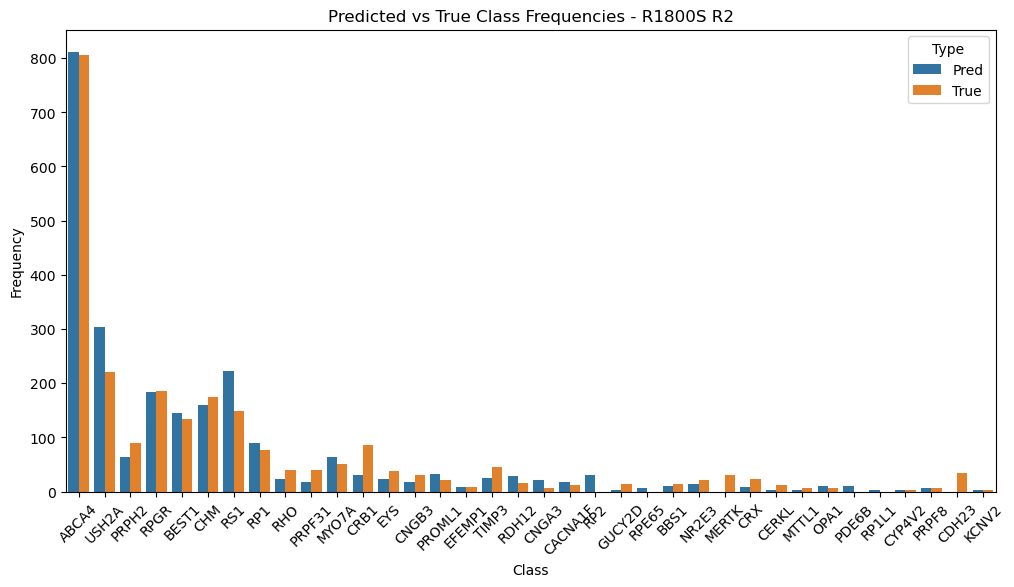

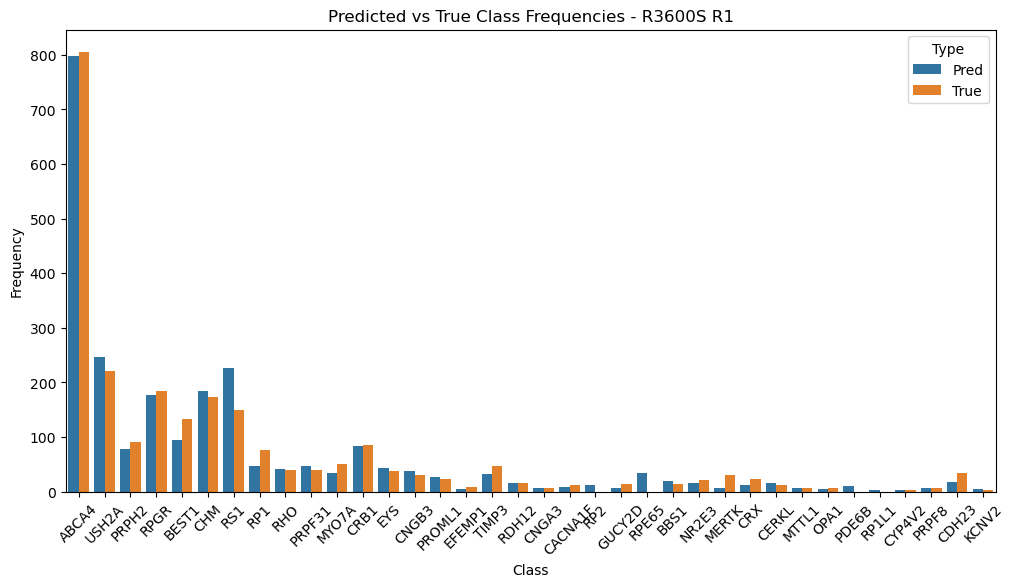

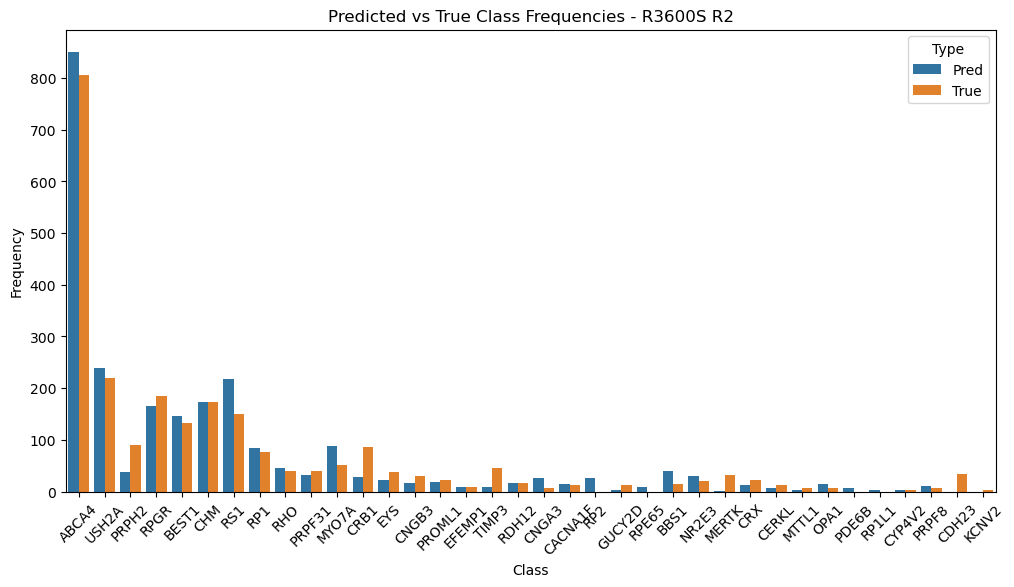

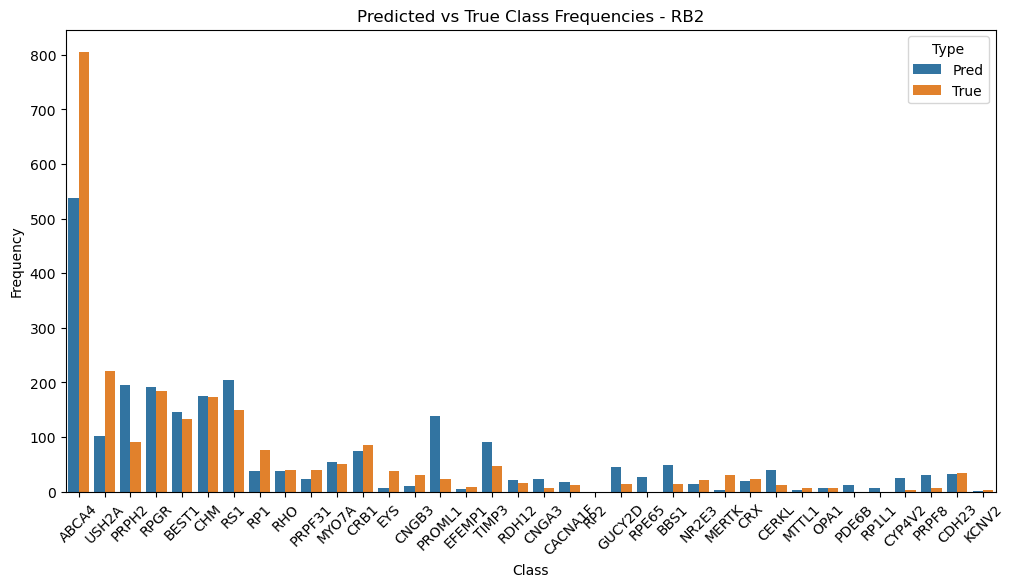

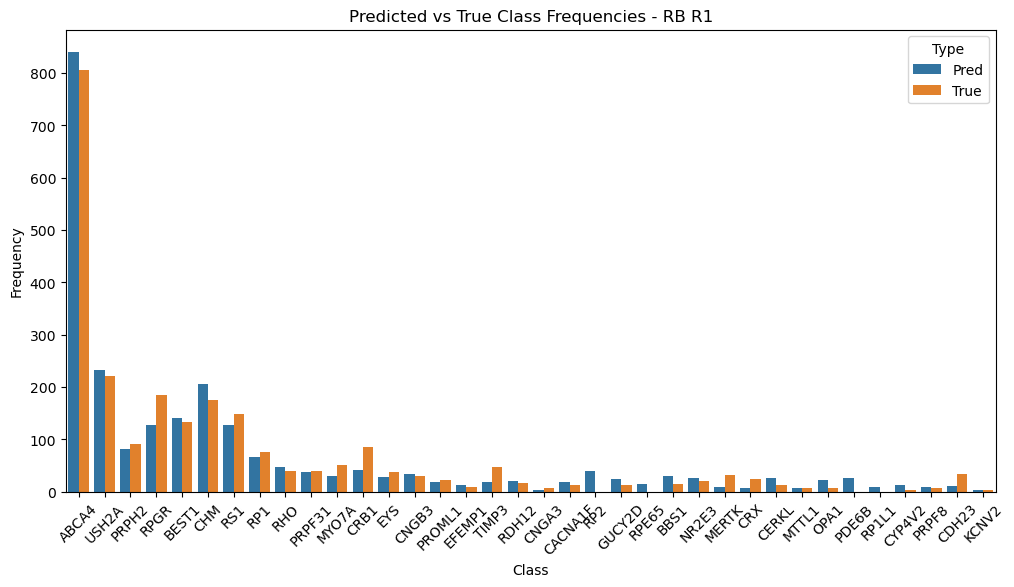

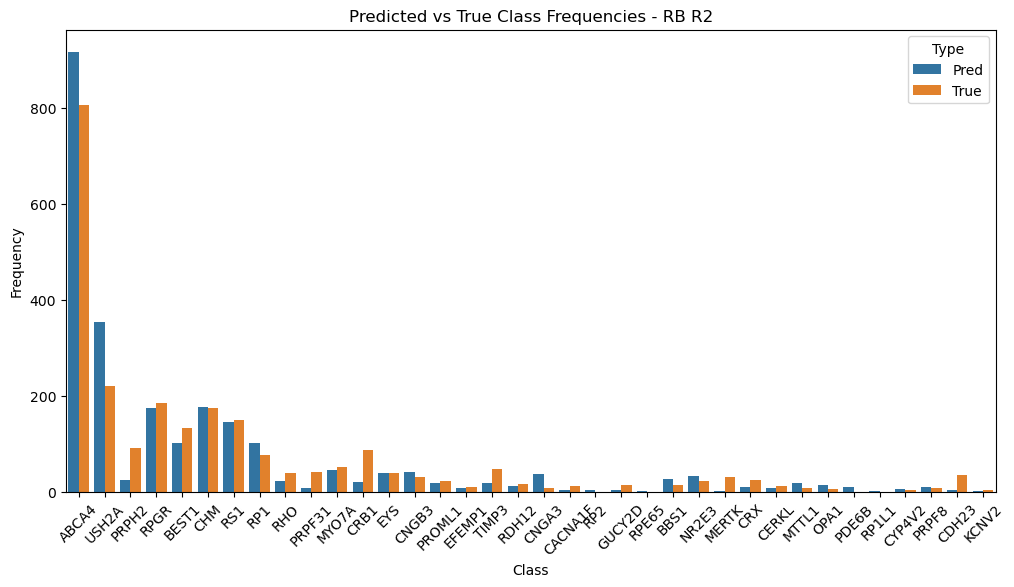

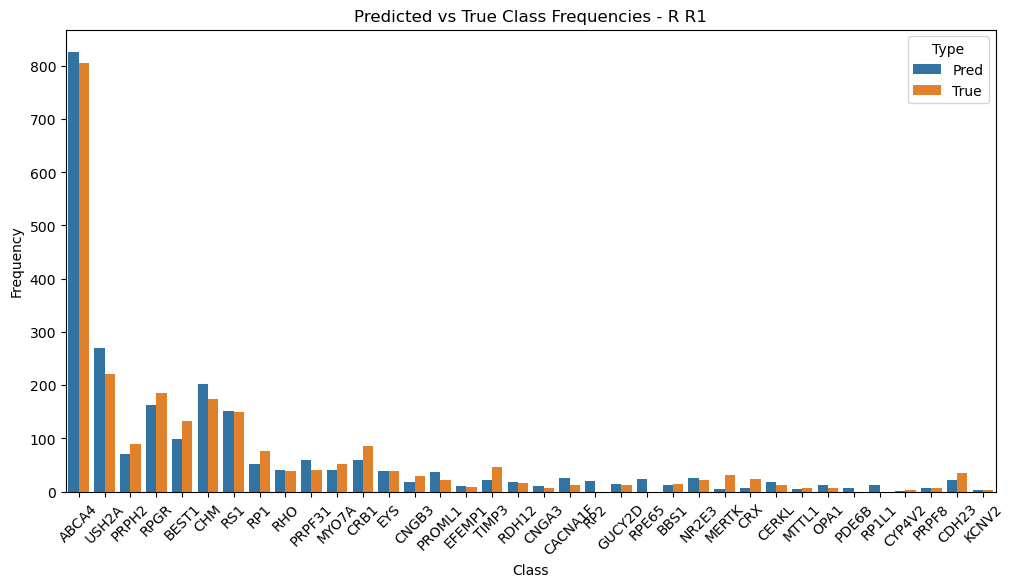

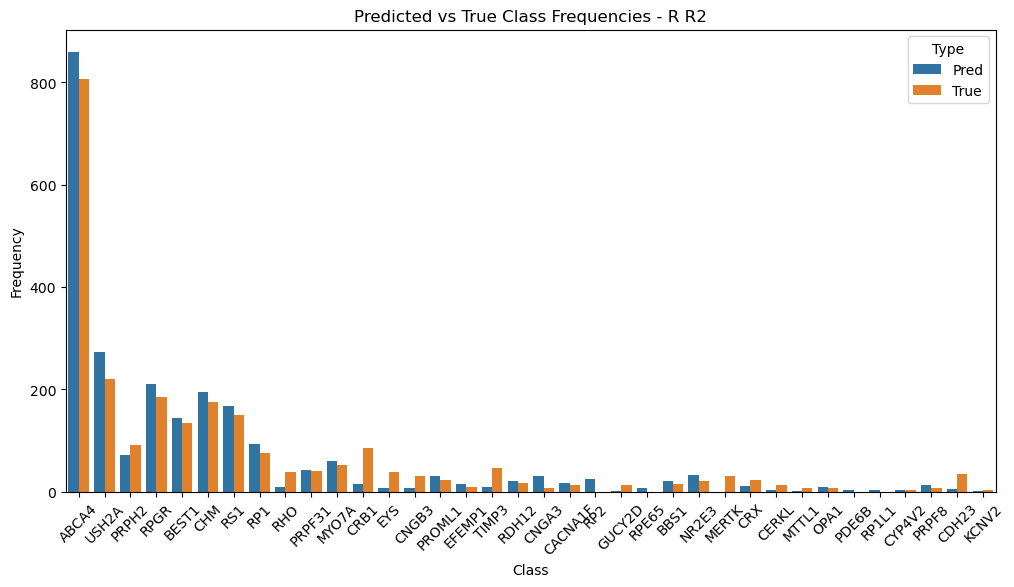

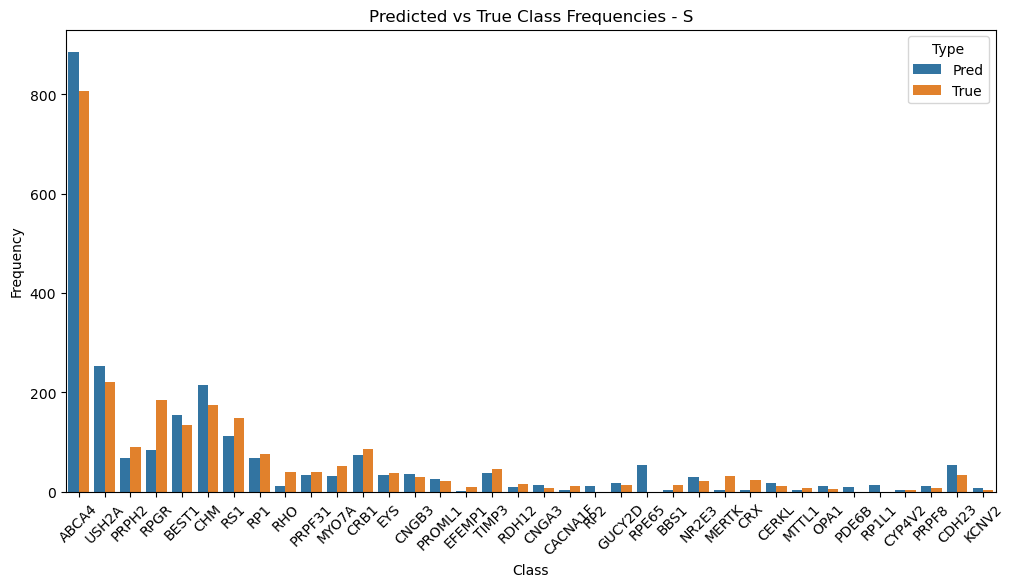

In [51]:
for m in cm.keys():
    title = m.split('_')[0].upper() + ' ' + m.split('_')[1].upper() if '_' in m else m
    make_barplot(cm[m], labels=classes, title='Predicted vs True Class Frequencies - ' + title, normalize=False)

# Visualize ROC curves

In [63]:
model_results = {}
for m in preds_dict.keys():
    cs = [cs for cs in classes if cs in preds_dict[m]['True Class'].unique()]
    auroc = AUROC(preds_dict[m], cs)
    model_results[m] = auroc(random_state=1399)

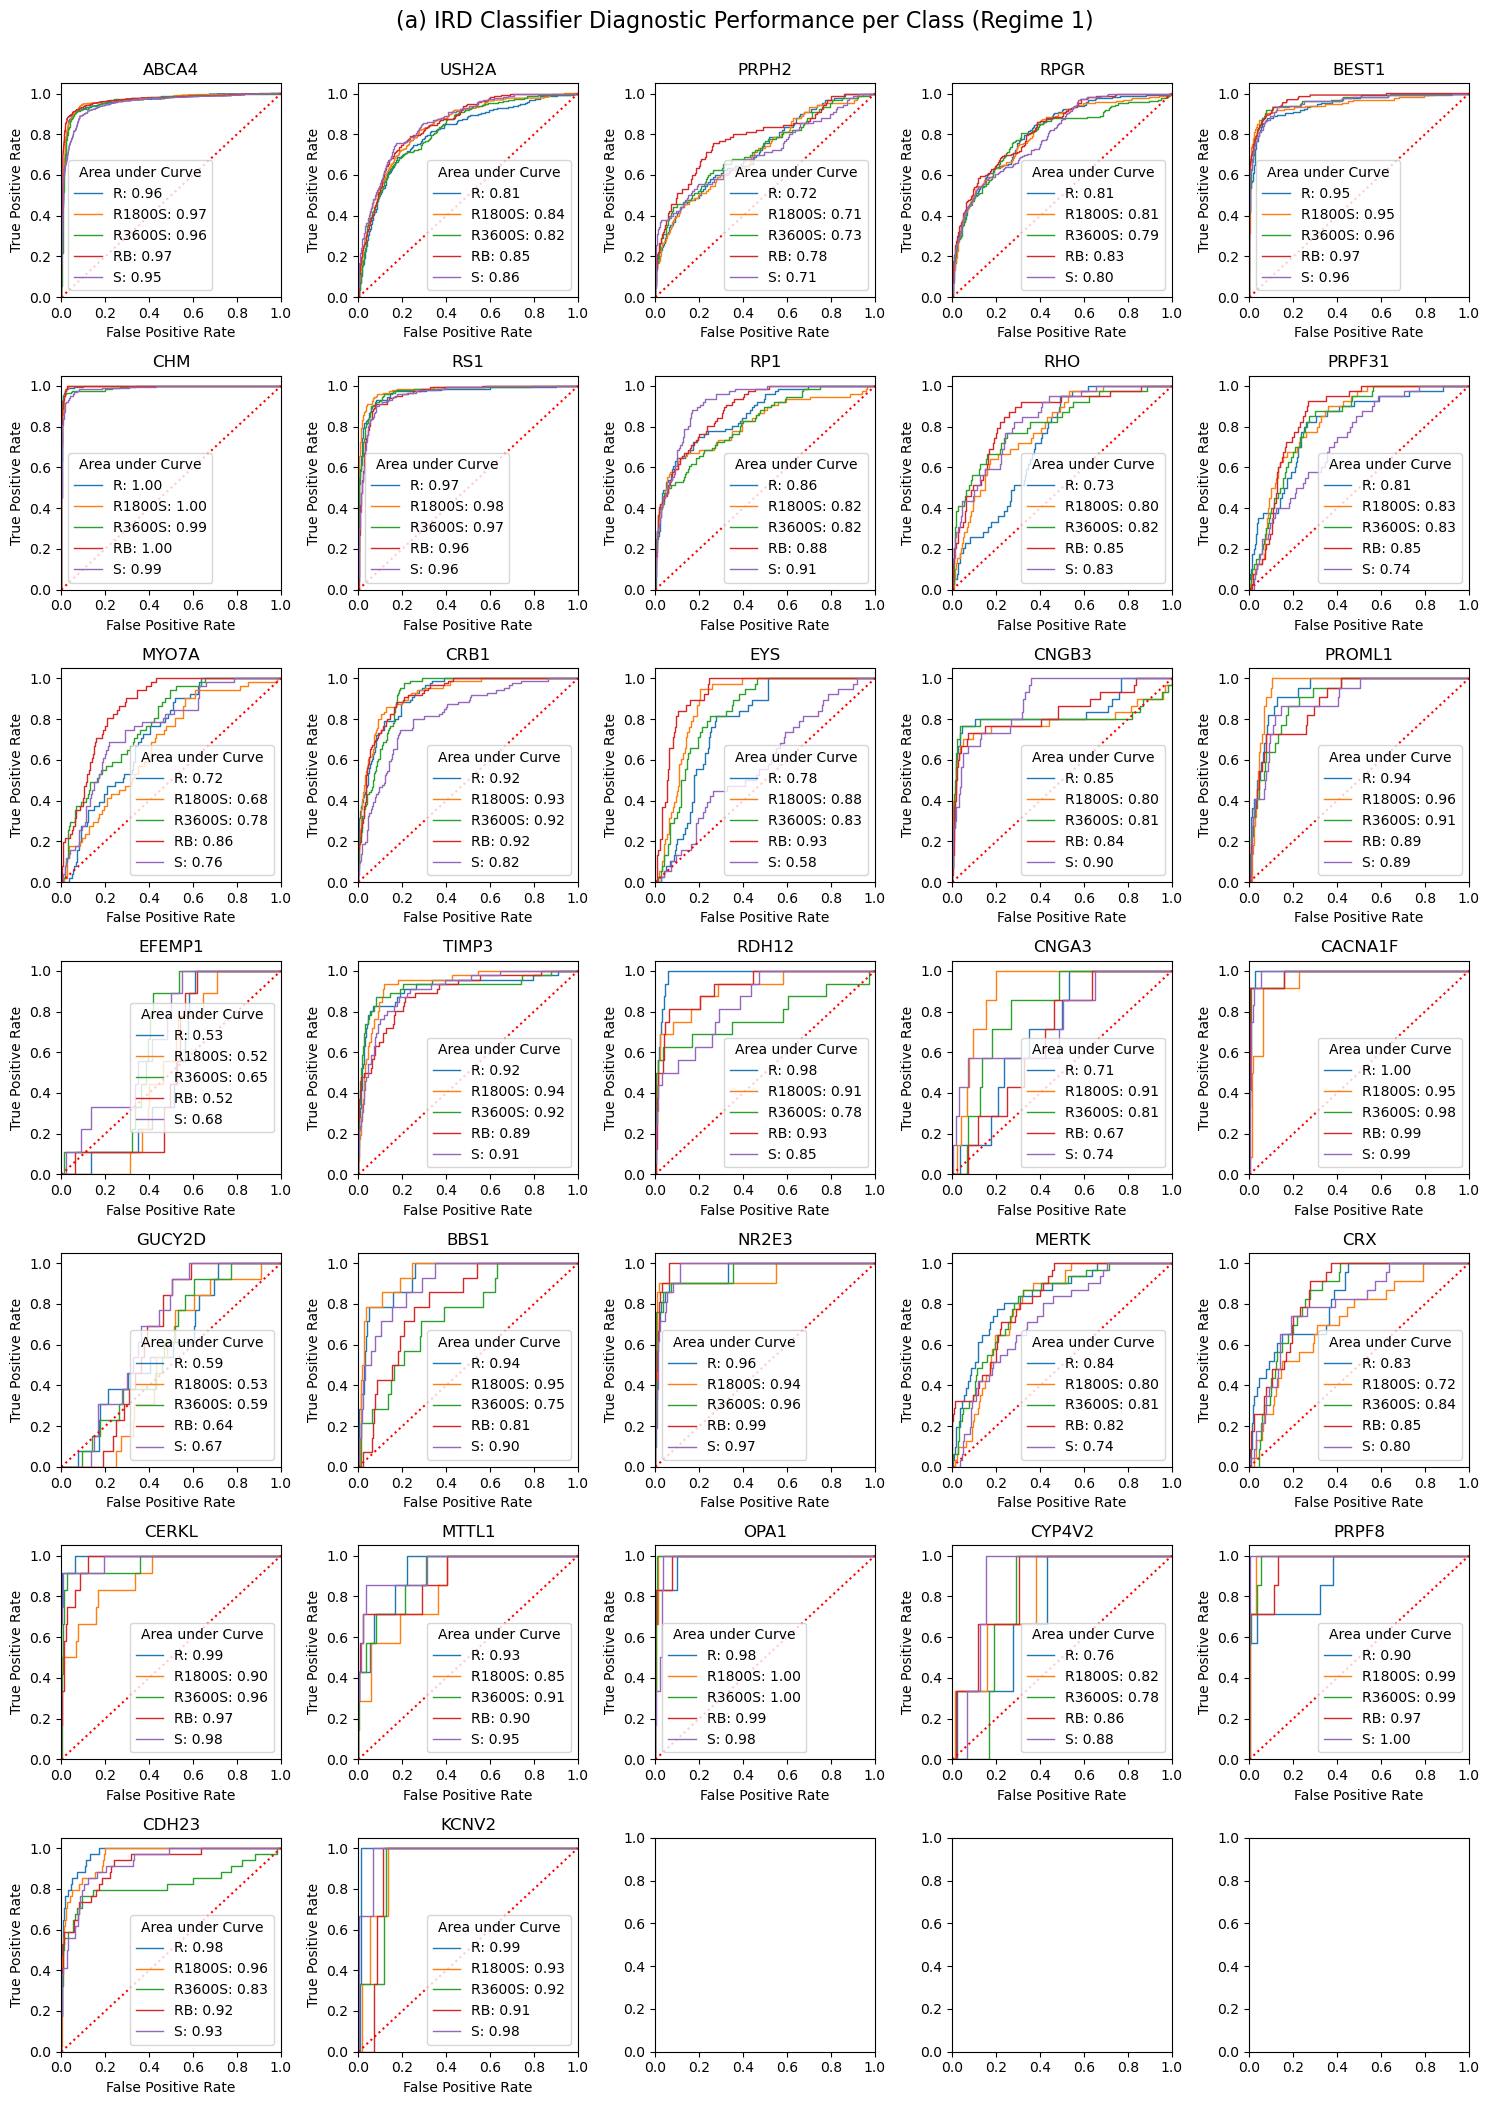

In [232]:
# plot roc regime 1 models
labels = [cs for cs in classes if cs in preds_dict['R_r1']['True Class'].unique()]
regime1_models = {k: preds_dict[k] for k in preds_dict.keys() if k.endswith('r1') or (k == 'S')}
plot_roc(7, 5, regime1_models, model_results, labels, '(a) IRD Classifier Diagnostic Performance per Class (Regime 1)')

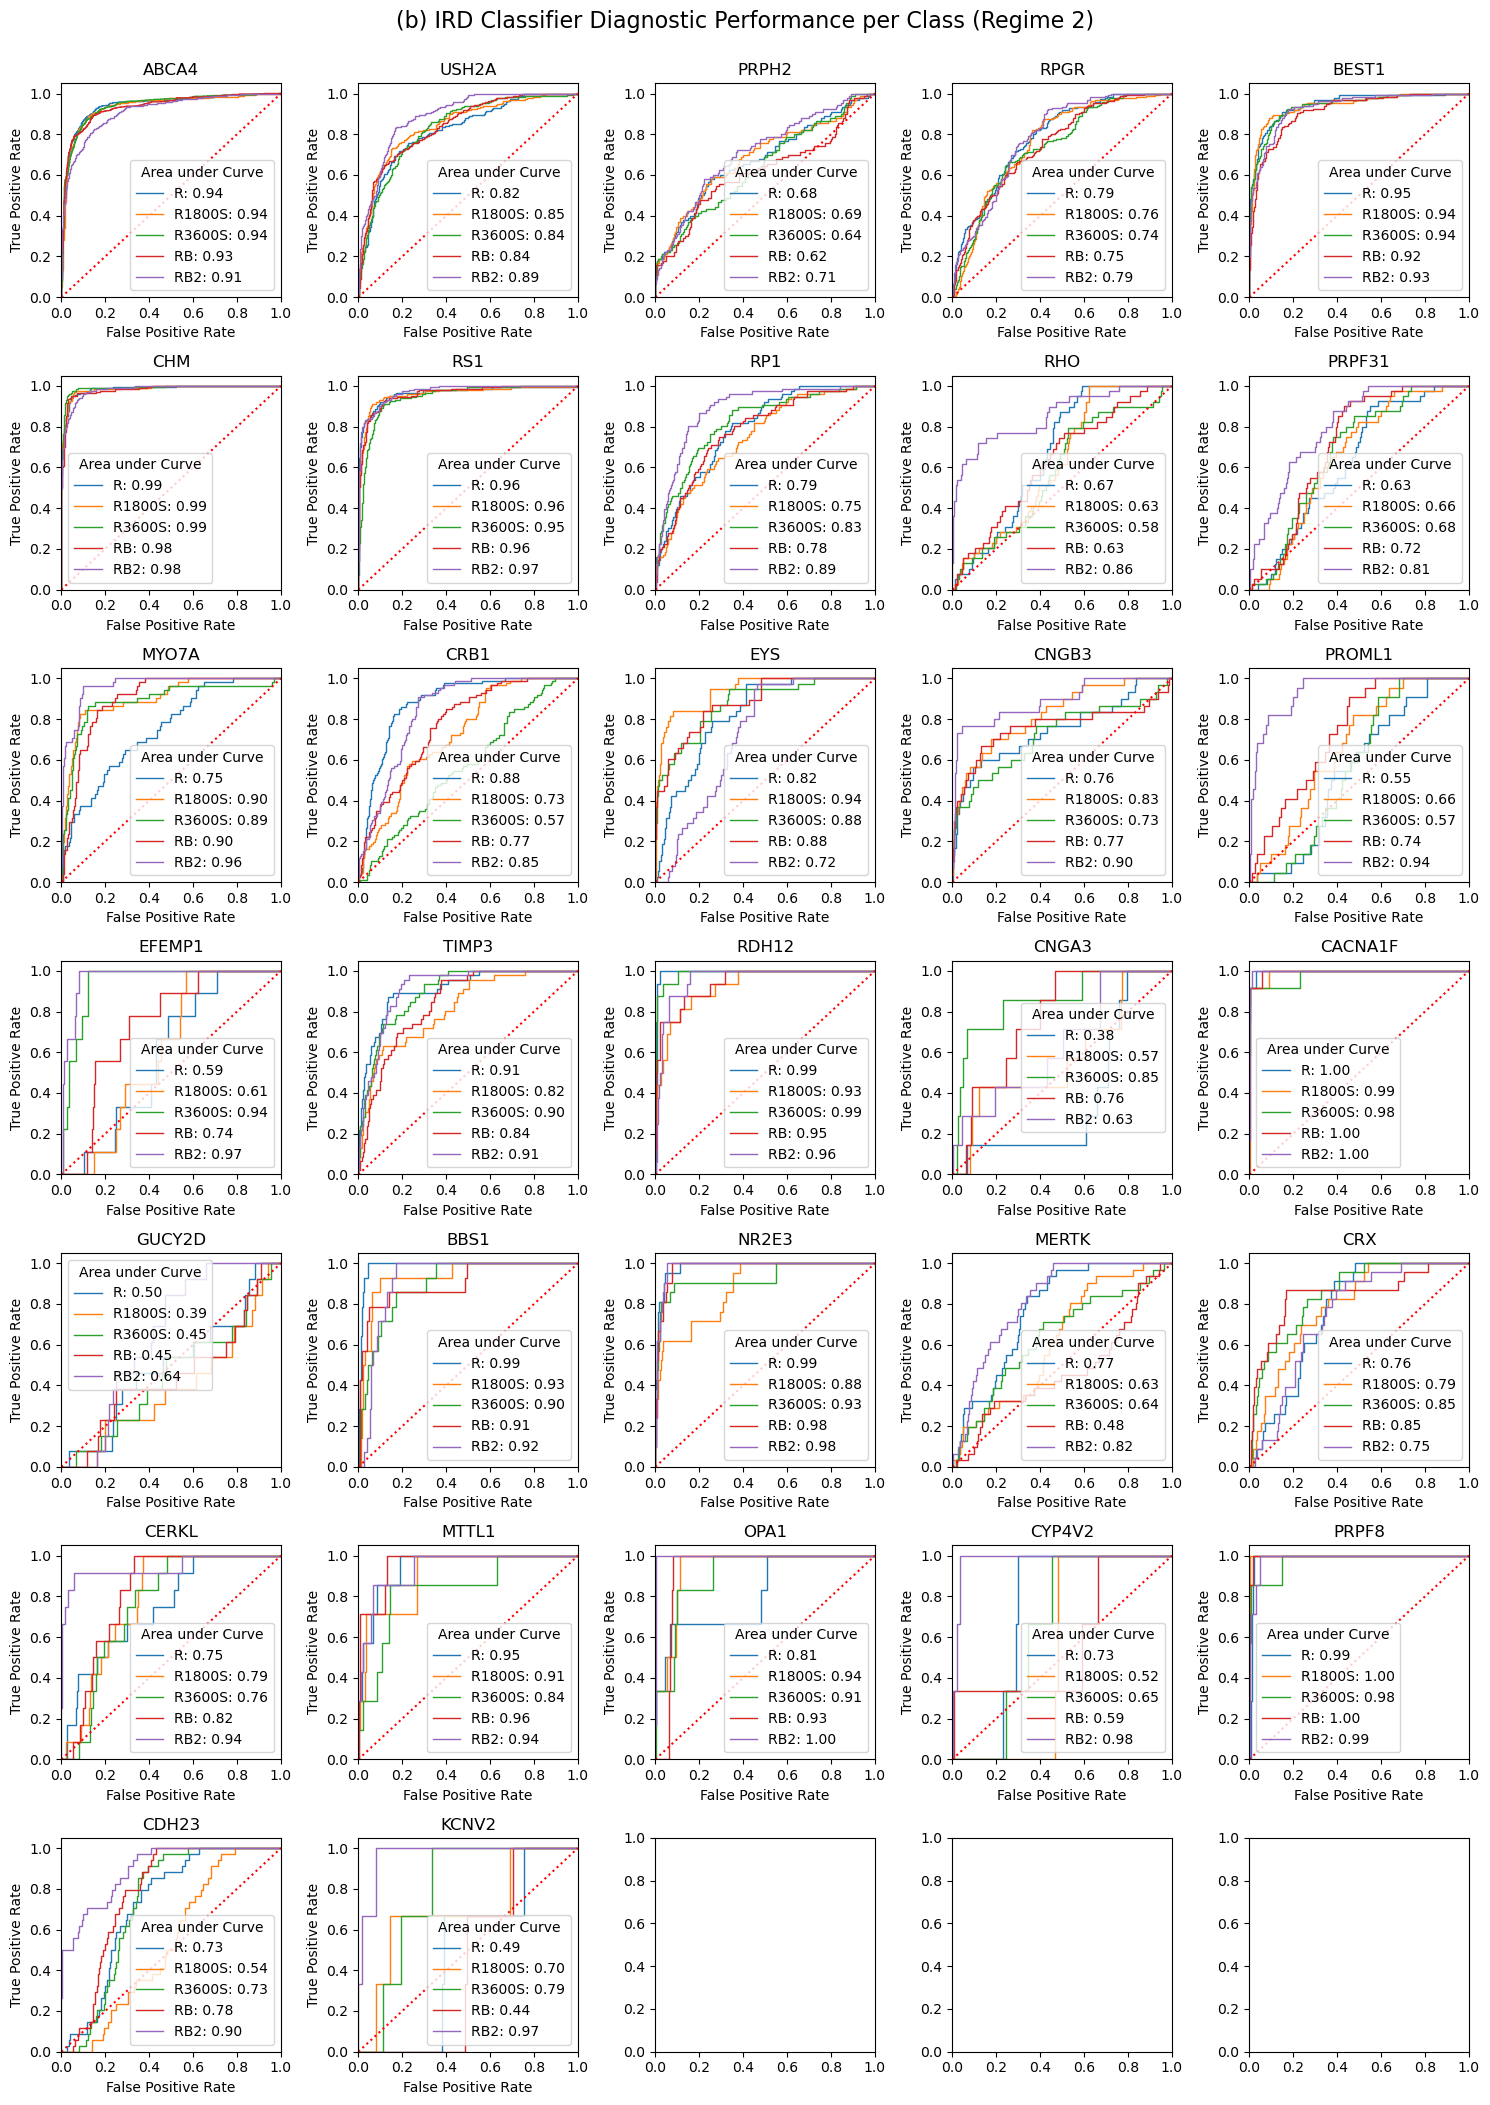

In [233]:
# plot roc regime 2 models
labels = [cs for cs in classes if cs in preds_dict['R_r2']['True Class'].unique()]
regime2_models = {k: preds_dict[k] for k in preds_dict.keys() if k.endswith('r2') or (k == 'RB2')}
plot_roc(7, 5, regime2_models, model_results, labels, '(b) IRD Classifier Diagnostic Performance per Class (Regime 2)')